# **Lab|Customer Analysis Round 1**

1. Task 1 Read the three files into python as dataframes



In [417]:
#Importing necessary libraries
import pandas as pd
import numpy as np

In [418]:
# To make run all you ask in one cell, not only the last required
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [419]:
#Assigning and reading the first file (file1.csv)
url1 = 'https://raw.githubusercontent.com/ironhack-labs/lab-customer-analysis-round-1/master/files_for_lab/csv_files/file1.csv'
data_file1 = pd.read_csv(url1)
data_file1.head()


,Customer,ST,GENDER,Education,Customer Lifetime Value,Income,Monthly Premium Auto,Number of Open Complaints,Policy Type,Vehicle Class,Total Claim Amount
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323


In [420]:
#Assigning and reading the second file (file2.csv)
url2 = 'https://raw.githubusercontent.com/ironhack-labs/lab-customer-analysis-round-1/master/files_for_lab/csv_files/file2.csv'
data_file2 = pd.read_csv(url2)
data_file2.head()

,Customer,ST,GENDER,Education,Customer Lifetime Value,Income,Monthly Premium Auto,Number of Open Complaints,Total Claim Amount,Policy Type,Vehicle Class
0,GS98873,Arizona,F,Bachelor,323912.47%,16061,88,1/0/00,633.6,Personal Auto,Four-Door Car
1,CW49887,California,F,Master,462680.11%,79487,114,1/0/00,547.2,Special Auto,SUV
2,MY31220,California,F,College,899704.02%,54230,112,1/0/00,537.6,Personal Auto,Two-Door Car
3,UH35128,Oregon,F,College,2580706.30%,71210,214,1/1/00,1027.2,Personal Auto,Luxury Car
4,WH52799,Arizona,F,College,380812.21%,94903,94,1/0/00,451.2,Corporate Auto,Two-Door Car


In [421]:
data_file1.describe()

,Income,Monthly Premium Auto,Total Claim Amount
count,1071.000000,1071.000000,1071.000000
mean,39295.701214,193.234360,404.986909
std,30469.427060,1601.190369,293.027260
min,0.000000,61.000000,0.382107
25%,14072.000000,68.000000,202.157702
50%,36234.000000,83.000000,354.729129
75%,64631.000000,109.500000,532.800000
max,99960.000000,35354.000000,2893.239678


**Finding**: It is missing Customer Lifetime value- suggests something is wrong in this column.

In [422]:
#Assigning and reading the third file (file3.csv)
url3 = 'https://raw.githubusercontent.com/ironhack-labs/lab-customer-analysis-round-1/master/files_for_lab/csv_files/file3.csv'
data_file3 = pd.read_csv(url3)
data_file3.head()

,Customer,State,Customer Lifetime Value,Education,Gender,Income,Monthly Premium Auto,Number of Open Complaints,Policy Type,Total Claim Amount,Vehicle Class
0,SA25987,Washington,3479.137523,High School or Below,M,0,104,0,Personal Auto,499.200000,Two-Door Car
1,TB86706,Arizona,2502.637401,Master,M,0,66,0,Personal Auto,3.468912,Two-Door Car
2,ZL73902,Nevada,3265.156348,Bachelor,F,25820,82,0,Personal Auto,393.600000,Four-Door Car
3,KX23516,California,4455.843406,High School or Below,F,0,121,0,Personal Auto,699.615192,SUV
4,FN77294,California,7704.958480,High School or Below,M,30366,101,2,Personal Auto,484.800000,SUV


2. Show the DataFrame's shape.

In [423]:
#data_file1 shape
data_file1.shape

(4008, 11)

In [424]:
#data_file2 shape
data_file2.shape

(996, 11)

In [425]:
#data_file3 shape
data_file3.shape

(7070, 11)

**Finding:** noticed, the number of columns are the same so we are good to proceed in terms of the number of columns, but the columns are not in order so we may need to rearrange them later.

3. Standardize header names.

Let's look at column headers first and see what is the easiest way to standardize them across three file dataframes.

In [426]:
#assigning variables to column names for each dataframes.
column_names1 = data_file1.columns
column_names2 = data_file2.columns
column_names3 = data_file3.columns

In [427]:
#standardizing data_file1
cols_1 = []
#[column_names1.lower() for column_names1 in data_file1.columns]

for column_names1 in data_file1.columns:
  cols_1.append(column_names1.lower())

data_file1.columns= cols_1


In [428]:
#standardizing data_file2
cols_2 = []
#[column_names2.lower() for column_names2 in data_file2.columns]

for column_names2 in data_file2.columns:
  cols_2.append(column_names2.lower())

data_file2.columns= cols_2

In [429]:
#standardizing data_file3
cols_3 = []
#[column_names3.lower() for column_names3 in data_file3.columns]

for column_names3 in data_file3.columns:
  cols_3.append(column_names3.lower())

data_file3.columns= cols_3

**Finding**: Datafile1 and Datafile2 contains values in 'customer lifetime value' as strings because it contains % sign. Need to fix it.

In [430]:
#customer lifetime value - first two files have % in the end, but the third file doesnot have it. We need to correct those.
data_file1['customer lifetime value'].dtype

#defining a function to remove %
def remove_perc_sign(x):
  if type(x)==str:
    return x.replace("%"," ")
    #if x.endswith('%'):
      #return x[:-1]
    #else:
      #return float(x)
  else:
    return float(x)

dtype('O')

In [431]:
print("------")
print(" ")
#using the function created in last line to remove % signs, map function will iterate over each row, and function will remove % sign
#then using the list command to create a list of these values

data_file1['customer lifetime value'] = list(map(remove_perc_sign,data_file1['customer lifetime value']))
data_file1['customer lifetime value'].head()
print(" ")
print("------")
print(" ")

data_file2['customer lifetime value'] = list(map(remove_perc_sign,data_file2['customer lifetime value']))
data_file2['customer lifetime value'].head()
print(" ")
print("------")
print(" ")



------
 


0            NaN
1     697953.59 
2    1288743.17 
3     764586.18 
4     536307.65 
Name: customer lifetime value, dtype: object

 
------
 


0     323912.47 
1     462680.11 
2     899704.02 
3    2580706.30 
4     380812.21 
Name: customer lifetime value, dtype: object

 
------
 


In [432]:
#after removing the % we need to convert customer lifetime values to float, defining a function for that
def conv_float(x):
  if type(x) == str:
    return float(x)
  else:
    return x

In [433]:
#now, repeating the process as above for removing % sign to convert the strings into floats
print(" ")
print("------")
print(" ")
data_file1['customer lifetime value'] = list(map(conv_float,data_file1['customer lifetime value']))
data_file1['customer lifetime value'].head()
print(" ")
print("------")
print(" ")
data_file2['customer lifetime value'] = list(map(conv_float,data_file2['customer lifetime value']))
data_file2['customer lifetime value'].head()
print(" ")
print("------")
print(" ")


 
------
 


0           NaN
1     697953.59
2    1288743.17
3     764586.18
4     536307.65
Name: customer lifetime value, dtype: float64

 
------
 


0     323912.47
1     462680.11
2     899704.02
3    2580706.30
4     380812.21
Name: customer lifetime value, dtype: float64

 
------
 


4. Rearrange the columns in the dataframe as needed.

In [434]:
#list of column headers data_file1,2,3.
print(" ")
print("------")
print(" ")

data_file1.columns.tolist()

#list of column headers data_file2
print(" ")
print("------")
print(" ")

data_file2.columns.tolist()

#list of column headers data_file2
print(" ")
print("------")
print(" ")

data_file3.columns.tolist()

 
------
 


['customer',
 'st',
 'gender',
 'education',
 'customer lifetime value',
 'income',
 'monthly premium auto',
 'number of open complaints',
 'policy type',
 'vehicle class',
 'total claim amount']

 
------
 


['customer',
 'st',
 'gender',
 'education',
 'customer lifetime value',
 'income',
 'monthly premium auto',
 'number of open complaints',
 'total claim amount',
 'policy type',
 'vehicle class']

 
------
 


['customer',
 'state',
 'customer lifetime value',
 'education',
 'gender',
 'income',
 'monthly premium auto',
 'number of open complaints',
 'policy type',
 'total claim amount',
 'vehicle class']

In [435]:
#in data_file2 has column header 'Total Claim Amount' in the wrong column index. It will be easier to move it to the last position.
data_file2 = data_file2.reindex(columns=['customer',
 'st',
 'gender',
 'education',
 'customer lifetime value',
 'income',
 'monthly premium auto',
 'number of open complaints',
 'policy type',
 'vehicle class',
 'total claim amount'])
data_file2.columns.tolist()

print(" ")
print("------")
print(" ")


#in data_file3 reindexing the headers to the same column headers as in data_file1
data_file3 = data_file3.reindex(columns=['customer',
 'st',
 'gender',
 'education',
 'customer lifetime value',
 'income',
 'monthly premium auto',
 'number of open complaints',
 'policy type',
 'vehicle class',
 'total claim amount'])
data_file3.columns.tolist()


['customer',
 'st',
 'gender',
 'education',
 'customer lifetime value',
 'income',
 'monthly premium auto',
 'number of open complaints',
 'policy type',
 'vehicle class',
 'total claim amount']

 
------
 


['customer',
 'st',
 'gender',
 'education',
 'customer lifetime value',
 'income',
 'monthly premium auto',
 'number of open complaints',
 'policy type',
 'vehicle class',
 'total claim amount']

5. Concatenate the three dataframes

In [436]:
#concatenating and checking shape, head and sample to see how it looks after:
data = pd.concat([data_file1,data_file2,data_file3],axis =0)
data.shape
print(" ")
print("------")
print(" ")
data.head(5)
print(" ")
print("------")
print(" ")
data.sample(5)

(12074, 11)

 
------
 


,customer,st,gender,education,customer lifetime value,income,monthly premium auto,number of open complaints,policy type,vehicle class,total claim amount
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.59,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323


 
------
 


,customer,st,gender,education,customer lifetime value,income,monthly premium auto,number of open complaints,policy type,vehicle class,total claim amount
908,XM72420,Arizona,F,High School or Below,391936.670000,66676.0,97.0,1/0/00,Personal Auto,Four-Door Car,558.099357
257,CF15558,Cali,F,Master,500426.380000,39161.0,63.0,1/1/00,Personal Auto,Two-Door Car,283.995953
4301,SH55598,NaN,F,High School or Below,3703.437656,23120.0,93.0,0,Personal Auto,Four-Door Car,446.400000
5937,IX97339,NaN,F,College,9234.277026,0.0,134.0,0,Corporate Auto,SUV,643.200000
4913,BR50492,NaN,M,Bachelor,49423.795570,85058.0,137.0,0,Personal Auto,SUV,595.369784


**Findings:**
1. Noticed customer column is actually storing car plates. I will keep it as it is for now, as it may not matter in this analysis to change it. 
2. gender has null values
3. CLV needs to be corrected.


6&7. Which columns are numerical? Which columns are categorical?

**by looking at the data**

1. customer                      - categorical
2. st                            - categorical
3. gender                        - categorical
4. education                     - categorical
5. customer lifetime value       - numerical
6. income                        - numerical
7. monthly premium auto          - numerical
8. number of open complaints     - numerical/categorical
9. policy type                   - categorical
10. vehicle class                - categorical
11. total claim amount           - numerical




In [437]:
#check if data types match the above deductions
data.dtypes
print(" ")
print("------")
print(" ")
#check if numeric data types match the above deductions
data.select_dtypes(include = np.object)
print(" ")
print("------")
print(" ")
#check if object data types match the above deductions
data.select_dtypes('object')
print(" ")
print("------")
print(" ")


customer                      object
st                            object
gender                        object
education                     object
customer lifetime value      float64
income                       float64
monthly premium auto         float64
number of open complaints     object
policy type                   object
vehicle class                 object
total claim amount           float64
dtype: object

 
------
 


,customer,st,gender,education,number of open complaints,policy type,vehicle class
0,RB50392,Washington,NaN,Master,1/0/00,Personal Auto,Four-Door Car
1,QZ44356,Arizona,F,Bachelor,1/0/00,Personal Auto,Four-Door Car
2,AI49188,Nevada,F,Bachelor,1/0/00,Personal Auto,Two-Door Car
3,WW63253,California,M,Bachelor,1/0/00,Corporate Auto,SUV
4,GA49547,Washington,M,High School or Below,1/0/00,Personal Auto,Four-Door Car
...,...,...,...,...,...,...,...
7065,LA72316,NaN,M,Bachelor,0,Personal Auto,Four-Door Car
7066,PK87824,NaN,F,College,0,Corporate Auto,Four-Door Car
7067,TD14365,NaN,M,Bachelor,3,Corporate Auto,Four-Door Car
7068,UP19263,NaN,M,College,0,Personal Auto,Four-Door Car


 
------
 


,customer,st,gender,education,number of open complaints,policy type,vehicle class
0,RB50392,Washington,NaN,Master,1/0/00,Personal Auto,Four-Door Car
1,QZ44356,Arizona,F,Bachelor,1/0/00,Personal Auto,Four-Door Car
2,AI49188,Nevada,F,Bachelor,1/0/00,Personal Auto,Two-Door Car
3,WW63253,California,M,Bachelor,1/0/00,Corporate Auto,SUV
4,GA49547,Washington,M,High School or Below,1/0/00,Personal Auto,Four-Door Car
...,...,...,...,...,...,...,...
7065,LA72316,NaN,M,Bachelor,0,Personal Auto,Four-Door Car
7066,PK87824,NaN,F,College,0,Corporate Auto,Four-Door Car
7067,TD14365,NaN,M,Bachelor,3,Corporate Auto,Four-Door Car
7068,UP19263,NaN,M,College,0,Personal Auto,Four-Door Car


 
------
 


8. Understand the meaning of all columns

**by looking at data above- deductions**
1. customer - this column identifies individual customer (through car plate numbers in this dataset). Datatype: String
2. st - this column idetifies where the customer has the policy registered. Data type: string                        
3. gender - this column identifies the gender of the customer. datatype: string 
4. education- this column probably stores the highest level of education of the customer. 
5. customer lifetime value - this column is the total amount of money customer is expected to spend in this company. 
6. income - this column stores the real/reported/predicted income level of the customer.                      
7. monthly premium auto - this is the amount of monthly premiums on their policy.          - 
8. number of open complaints - this column stores the number of open complaints stored from the customer. It is stored in #1/#2/# format so probably it is storing it in categorical way like departments or identifiers.
9. policy type - this column stores the type of policy chosen by the customer, so it can be the policy options offered by this company.
10. vehicle class - this column is storing the type of vehicle (probably the policy types are dependant on this)
11. total claim amount- this column is storing the total amount claimed by the customer. this needs to be checked and probably paid out/rejected dependant on the claim.


9. Perform the data cleaning operations mentioned so far in class

In [438]:
#drop the columns education and number of open complaints.
data = data.drop(['education'],axis=1)
data = data.drop(['number of open complaints'],axis = 1)
data.head(5)

#ran data = above commands, which removed 'education' and 'number of opens' and now it cannot find it, so it gives the KeyError

,customer,st,gender,customer lifetime value,income,monthly premium auto,policy type,vehicle class,total claim amount
0,RB50392,Washington,NaN,NaN,0.0,1000.0,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,697953.59,0.0,94.0,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,1288743.17,48767.0,108.0,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,764586.18,0.0,106.0,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,536307.65,36357.0,68.0,Personal Auto,Four-Door Car,17.269323


In [439]:
#Correct the values in the column customer lifetime value. They are given as a percent, so multiply them by 100 and change dtype to numerical type.

mult_100 = lambda x: x*100

data['customer lifetime value'] = list(map(mult_100, data['customer lifetime value']))

#data['customer lifetime value'].head(10)
data.head(10)
print("Checking dtype for CLV      ")
print("------")
print("      ")
#already converted dtypes to float above for datafile1 and datafile2
#checking it again
data['customer lifetime value'].dtypes
print("Checking shape     ")
print("------")
print("      ")
#check for duplicate rows in the data and remove if any:

#make a duplicate copy of the dataframe
data_c = data.copy()
data_c.shape

#removing duplicate rows
print("Checking first ten rows of copy of dataframe     ")
print("------")
print("      ")
data_c = data_c.drop_duplicates(subset=['customer','gender'],keep='last')
data_c.head(10)



,customer,st,gender,customer lifetime value,income,monthly premium auto,policy type,vehicle class,total claim amount
0,RB50392,Washington,NaN,NaN,0.0,1000.0,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,69795359.0,0.0,94.0,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,128874317.0,48767.0,108.0,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,76458618.0,0.0,106.0,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,53630765.0,36357.0,68.0,Personal Auto,Four-Door Car,17.269323
5,OC83172,Oregon,F,82562978.0,62902.0,69.0,Personal Auto,Two-Door Car,159.383042
6,XZ87318,Oregon,F,53808986.0,55350.0,67.0,Corporate Auto,Four-Door Car,321.600000
7,CF85061,Arizona,M,72161003.0,0.0,101.0,Corporate Auto,Four-Door Car,363.029680
8,DY87989,Oregon,M,241275040.0,14072.0,71.0,Corporate Auto,Four-Door Car,511.200000
9,BQ94931,Oregon,F,73881781.0,28812.0,93.0,Special Auto,Four-Door Car,425.527834


Checking dtype for CLV      
------
      


dtype('float64')

Checking shape     
------
      


(12074, 9)

Checking first ten rows of copy of dataframe     
------
      


,customer,st,gender,customer lifetime value,income,monthly premium auto,policy type,vehicle class,total claim amount
0,RB50392,Washington,NaN,NaN,0.0,1000.0,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,69795359.0,0.0,94.0,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,128874317.0,48767.0,108.0,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,76458618.0,0.0,106.0,Corporate Auto,SUV,529.881344
5,OC83172,Oregon,F,82562978.0,62902.0,69.0,Personal Auto,Two-Door Car,159.383042
6,XZ87318,Oregon,F,53808986.0,55350.0,67.0,Corporate Auto,Four-Door Car,321.600000
7,CF85061,Arizona,M,72161003.0,0.0,101.0,Corporate Auto,Four-Door Car,363.029680
8,DY87989,Oregon,M,241275040.0,14072.0,71.0,Corporate Auto,Four-Door Car,511.200000
9,BQ94931,Oregon,F,73881781.0,28812.0,93.0,Special Auto,Four-Door Car,425.527834
10,SX51350,California,M,47389920.0,0.0,67.0,Personal Auto,Four-Door Car,482.400000


In [440]:
#check for duplicate rows in the data and remove if any:

#make a duplicate copy of the dataframe
data_c = data.copy()
data_c.shape
print("      ")
print("------")
print("      ")

#removing duplicate rows

data_c = data_c.drop_duplicates(subset=['customer','gender'],keep='last')
data_c.head(10)
print("      ")
print("------")
print("      ")

(12074, 9)

      
------
      


,customer,st,gender,customer lifetime value,income,monthly premium auto,policy type,vehicle class,total claim amount
0,RB50392,Washington,NaN,NaN,0.0,1000.0,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,69795359.0,0.0,94.0,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,128874317.0,48767.0,108.0,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,76458618.0,0.0,106.0,Corporate Auto,SUV,529.881344
5,OC83172,Oregon,F,82562978.0,62902.0,69.0,Personal Auto,Two-Door Car,159.383042
6,XZ87318,Oregon,F,53808986.0,55350.0,67.0,Corporate Auto,Four-Door Car,321.600000
7,CF85061,Arizona,M,72161003.0,0.0,101.0,Corporate Auto,Four-Door Car,363.029680
8,DY87989,Oregon,M,241275040.0,14072.0,71.0,Corporate Auto,Four-Door Car,511.200000
9,BQ94931,Oregon,F,73881781.0,28812.0,93.0,Special Auto,Four-Door Car,425.527834
10,SX51350,California,M,47389920.0,0.0,67.0,Personal Auto,Four-Door Car,482.400000


      
------
      


In [441]:
#filtering the data for customers who have an income of 0 or less
data_c['income_zero']=data_c['income']=0
data_c['income_0_less']=data_c['income']<0
data_c.sample(6)
print("      ")
print("------")
print("      ")
#data_c['income_0_less'] = [(data_c['income']<0)|(data_c['income_zero'])]
data_c.head()

,customer,st,gender,customer lifetime value,income,monthly premium auto,policy type,vehicle class,total claim amount,income_zero,income_0_less
864,DK94262,Oregon,M,8.507129e+07,0,106.0,Personal Auto,SUV,513.818403,0,False
1538,TQ37204,NaN,F,8.629329e+05,0,107.0,Personal Auto,SUV,480.521227,0,False
1548,KE57057,NaN,F,2.300335e+05,0,66.0,Corporate Auto,Four-Door Car,475.200000,0,False
831,YH43996,AZ,M,1.018965e+08,0,101.0,Personal Auto,Four-Door Car,727.200000,0,False
872,JO64487,NaN,F,6.943742e+05,0,76.0,Special Auto,Four-Door Car,547.200000,0,False
944,QL45827,NaN,F,2.580706e+06,0,214.0,Personal Auto,Luxury Car,1027.200000,0,False


      
------
      


,customer,st,gender,customer lifetime value,income,monthly premium auto,policy type,vehicle class,total claim amount,income_zero,income_0_less
0,RB50392,Washington,NaN,NaN,0,1000.0,Personal Auto,Four-Door Car,2.704934,0,False
1,QZ44356,Arizona,F,69795359.0,0,94.0,Personal Auto,Four-Door Car,1131.464935,0,False
2,AI49188,Nevada,F,128874317.0,0,108.0,Personal Auto,Two-Door Car,566.472247,0,False
3,WW63253,California,M,76458618.0,0,106.0,Corporate Auto,SUV,529.881344,0,False
5,OC83172,Oregon,F,82562978.0,0,69.0,Personal Auto,Two-Door Car,159.383042,0,False


In [442]:
data_c['income_0_less'] = data_c[(data_c['income_zero']|data_c['income_0_less']==True)]
data_c.head()

,customer,st,gender,customer lifetime value,income,monthly premium auto,policy type,vehicle class,total claim amount,income_zero,income_0_less
0,RB50392,Washington,NaN,NaN,0,1000.0,Personal Auto,Four-Door Car,2.704934,0,NaN
1,QZ44356,Arizona,F,69795359.0,0,94.0,Personal Auto,Four-Door Car,1131.464935,0,NaN
2,AI49188,Nevada,F,128874317.0,0,108.0,Personal Auto,Two-Door Car,566.472247,0,NaN
3,WW63253,California,M,76458618.0,0,106.0,Corporate Auto,SUV,529.881344,0,NaN
5,OC83172,Oregon,F,82562978.0,0,69.0,Personal Auto,Two-Door Car,159.383042,0,NaN




# **Lab | Customer Analysis Round 2**

In [443]:
#import relevant libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [444]:
#creating dataframa from source file
url='https://raw.githubusercontent.com/ironhack-labs/lab-customer-analysis-round-2/master/files_for_lab/csv_files/marketing_customer_analysis.csv'
data = pd.read_csv(url)
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [445]:
# To make run all you ask in one cell, not only the last required
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [446]:
#standardizing the header names
column_names = data.columns
column_names

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [447]:
#changing column headers to lowercase
cols =[]
for column_name in data.columns:
  cols.append(column_name.lower())
column_names = cols

#cols

In [448]:
data.shape

(9134, 24)

In [449]:
# numeric data

data._get_numeric_data()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [450]:
data.select_dtypes('object')

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,2/3/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [451]:
#find null values
data.isna().sum()
#data.dtypes

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [452]:
#Datetime format- Extract the months from the dataset and store in a separate column. Then filter the data to show only the information for the first quarter , ie Jan Feb and March
import time
from datetime import time

data['Effective To Date'] = pd.to_datetime(data['Effective To Date'],errors='coerce')
data.dtypes

Customer                                 object
State                                    object
Customer Lifetime Value                 float64
Response                                 object
Coverage                                 object
Education                                object
Effective To Date                datetime64[ns]
EmploymentStatus                         object
Gender                                   object
Income                                    int64
Location Code                            object
Marital Status                           object
Monthly Premium Auto                      int64
Months Since Last Claim                   int64
Months Since Policy Inception             int64
Number of Open Complaints                 int64
Number of Policies                        int64
Policy Type                              object
Policy                                   object
Renew Offer Type                         object
Sales Channel                           

In [453]:
#filter the data for the first quarter:
data['months']=pd.DatetimeIndex(data['Effective To Date']).month
#data.loc[data['months']<4]
#data.loc[data['Effective To Date']<'2011-04-01']
#data['Effective To Date'][0].month
#month_li = lambda x:data['Effective To Date'][x].month
#data['month1'] = list(map(lambda x:data['Effective To Date'][x].month,data['Effective To Date']))
#data.head()



In [454]:
#filter the data for first 4 months:
data['months']<4

data.sample(6)

0       True
1       True
2       True
3       True
4       True
        ... 
9129    True
9130    True
9131    True
9132    True
9133    True
Name: months, Length: 9134, dtype: bool

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,months
4422,QM78112,Washington,2810.464447,Yes,Basic,Bachelor,2011-02-27,Employed,M,26790,Suburban,Married,71,4,41,0,1,Personal Auto,Personal L3,Offer2,Agent,340.800000,Two-Door Car,Medsize,2
7482,AI74959,California,3933.813993,Yes,Basic,High School or Below,2011-01-23,Employed,M,25927,Suburban,Single,103,6,20,0,1,Personal Auto,Personal L3,Offer2,Web,674.973614,SUV,Medsize,1
6452,WU95334,California,7019.177186,Yes,Basic,College,2011-01-23,Retired,M,26806,Suburban,Married,63,32,19,0,2,Personal Auto,Personal L3,Offer1,Agent,302.400000,Four-Door Car,Medsize,1
8897,JR89623,California,2698.693364,No,Basic,High School or Below,2011-02-21,Employed,F,76025,Rural,Married,67,29,0,0,1,Corporate Auto,Corporate L3,Offer2,Branch,151.021648,Four-Door Car,Medsize,2
5506,AI11191,Arizona,4228.248035,No,Basic,High School or Below,2011-02-24,Employed,F,77853,Rural,Single,106,12,76,0,1,Personal Auto,Personal L2,Offer1,Branch,165.237444,SUV,Medsize,2
1985,TI61458,California,27789.692350,Yes,Extended,Bachelor,2011-01-20,Employed,F,33806,Urban,Divorced,89,32,59,0,2,Personal Auto,Personal L3,Offer2,Web,395.729716,Four-Door Car,Medsize,1


In [ ]:
#BONUS: Put all the previously mentioned data transformations into a function.

#def date_trans(date):
  #data['Effective To Date'] = pd.to_datetime(data['Effective To Date'],errors='coerce')

# **Lab | Customer Analysis Round 3**

**EDA (Exploratory Data Analysis)**

In [455]:
#show info of the dataframe

data.head()


,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,months
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,2
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,1
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,2
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,1
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,2


In [456]:
data.describe(include =[np.object])

,Customer,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
count,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134
unique,9134,5,2,3,5,5,2,3,3,3,9,4,4,6,3
top,PR53785,California,No,Basic,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Four-Door Car,Medsize
freq,1,3150,7826,5568,2748,5698,4658,5779,5298,6788,3426,3752,3477,4621,6424


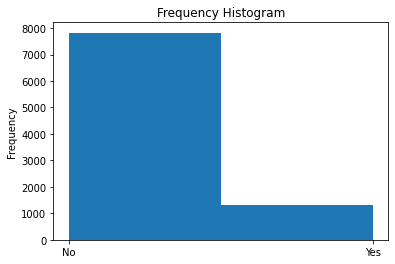

In [458]:
#plotting histogram for response

x = data['Response']
plt.hist(x, bins=2)
plt.gca().set(title='Frequency Histogram', ylabel='Frequency');

Text(0.5, 1.0, 'Sales Channel v response rate')

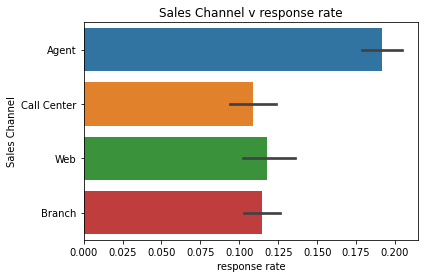

In [459]:
#Show a plot of the response rate by the sales channel.


#from collections import counter
def resp_rate(x):
  if x== "No":
    return 0
  else:
    return 1

data['response rate'] = list(map(resp_rate,data['Response']))
#objects = data['response rate']
#y_pos = np.arange(len(objects))
#performance = [10,8,6,4,2,1]
ax = sns.barplot(x="response rate",y="Sales Channel", data=data)
#plt.barh(y_pos, performance, align='center')
#plt.xlabel('Usage')
plt.title('Sales Channel v response rate')

plt.show()

#plt.scatter(x="response rate",y="Sales Channel")

#plt.show()

#plt.hist(x, bins=)
#plt.gca().set(title='Frequency Histogram', ylabel='Frequency');

#plt.hist(x, bins=2)
#plt.gca().set(title='Frequency Histogram', ylabel='Frequency');
#Show a plot of the response rate by income.
#plt.scatter(x=data['reponse rate'],y=data['Sales Channel'])
#plt.show()

Text(0.5, 1.0, 'Total Claim Amount v response rate by Sales Channel')

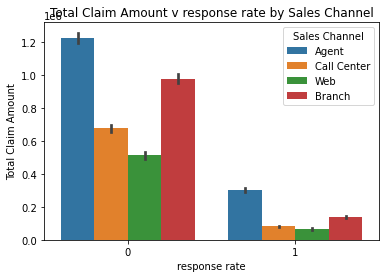

In [460]:
#Show a plot of the response rate by the total claim amount.
#ax = sns.barplot(x="response rate", y="Total Claim Amount", data=data,estimator = np.sum)
#plt.title('Total Claim Amount v response rate')
ax = sns.barplot(x="response rate", y="Total Claim Amount", hue="Sales Channel", data=data,estimator = np.sum)

plt.title('Total Claim Amount v response rate by Sales Channel')
#ax = sns.barplot(x="response rate", y="Total Claim Amount", data=data, label = "Response rate", color="b")

#plt.barh(y_pos, performance, align='center')
#plt.xlabel('Usage')


plt.show()

Text(0.5, 1.0, 'Reponse vs Income')

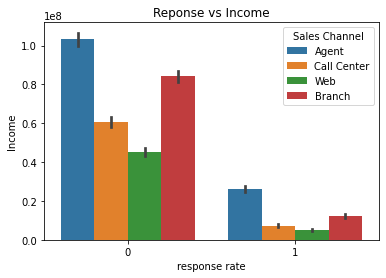

In [461]:
#Show a plot of the response rate by income
#y_positions = range(len(data['response rate']))

ax = sns.barplot(x="response rate", y="Income", hue="Sales Channel", data=data, estimator=np.sum)


plt.title("Reponse vs Income")
plt.show()




# **Lab | Customer Analysis Round 4**

In [462]:
data.shape

(9134, 26)

1. Check the data types of the columns. Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. (You can use np.number and np.object to select the numerical data types and categorical data types respectively)

In [463]:
data.dtypes #checking the data types of the columns


Customer                                 object
State                                    object
Customer Lifetime Value                 float64
Response                                 object
Coverage                                 object
Education                                object
Effective To Date                datetime64[ns]
EmploymentStatus                         object
Gender                                   object
Income                                    int64
Location Code                            object
Marital Status                           object
Monthly Premium Auto                      int64
Months Since Last Claim                   int64
Months Since Policy Inception             int64
Number of Open Complaints                 int64
Number of Policies                        int64
Policy Type                              object
Policy                                   object
Renew Offer Type                         object
Sales Channel                           

In [464]:
numerical = data.select_dtypes(include = np.number)
categorical = data.select_dtypes(include = np.object)
print("------")
numerical.dtypes
print("------")
print("------")
categorical.dtypes
#data['numerical'] = data._get_numeric_data()  #getting numeric data types, and creating a column
#data['categorical'] =data.select_dtypes('object') #getting categorical data types, and creating a column
#data['numerical'].dtypes

------


Customer Lifetime Value          float64
Income                             int64
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Total Claim Amount               float64
months                             int64
response rate                      int64
dtype: object

------
------


Customer            object
State               object
Response            object
Coverage            object
Education           object
EmploymentStatus    object
Gender              object
Location Code       object
Marital Status      object
Policy Type         object
Policy              object
Renew Offer Type    object
Sales Channel       object
Vehicle Class       object
Vehicle Size        object
dtype: object

In [465]:
#data.select_dtypes('object')
numerical.shape

(9134, 10)

In [466]:
categorical.shape

(9134, 15)

2. Now we will try to check the normality of the numerical variables visually

  1. Use seaborn library to construct distribution plots for the numerical variables
  2. Use Matplotlib to construct histograms
  3. Do the distributions for different numerical variables look like a normal distribution

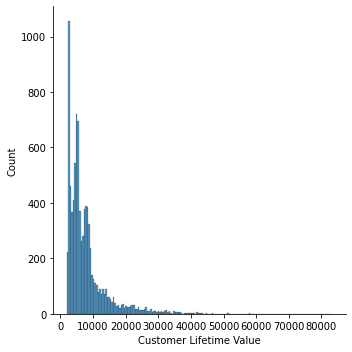

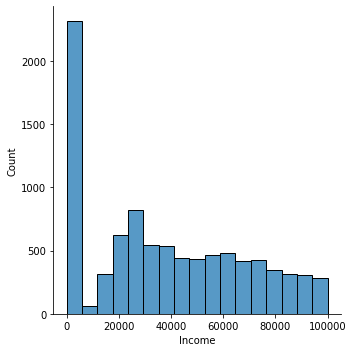

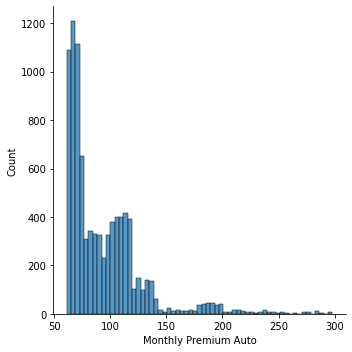

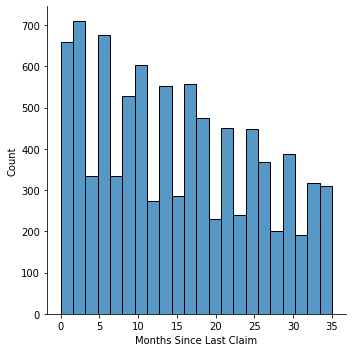

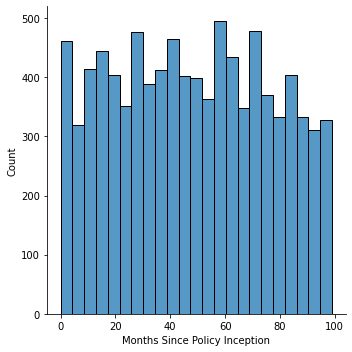

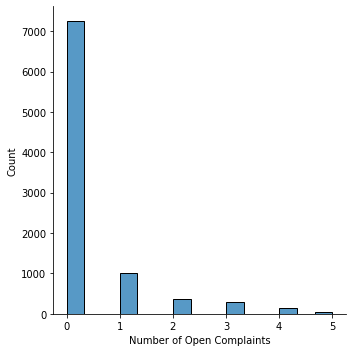

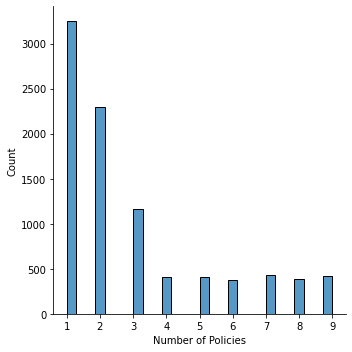

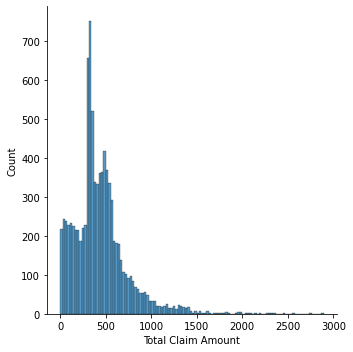

In [467]:
#print distribution plots
%matplotlib inline
for i in range(8):
  sns.displot(numerical.iloc[:,i])
  plt.show()
#sns.(numerical.iloc[:i])
#plt.show()
#plt.show()


(array([4.726e+03, 2.534e+03, 7.960e+02, 3.970e+02, 2.400e+02, 1.730e+02,
        8.800e+01, 6.600e+01, 4.700e+01, 2.800e+01, 1.300e+01, 7.000e+00,
        4.000e+00, 6.000e+00, 3.000e+00, 2.000e+00, 1.000e+00, 2.000e+00,
        0.000e+00, 1.000e+00]),
 array([ 1898.007675  ,  5969.37635075, 10040.7450265 , 14112.11370225,
        18183.482378  , 22254.85105375, 26326.2197295 , 30397.58840525,
        34468.957081  , 38540.32575675, 42611.6944325 , 46683.06310825,
        50754.431784  , 54825.80045975, 58897.1691355 , 62968.53781125,
        67039.906487  , 71111.27516275, 75182.6438385 , 79254.01251425,
        83325.38119   ]),
 <a list of 20 Patch objects>)

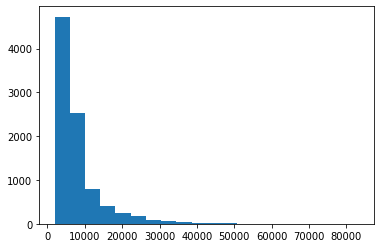

(array([2317.,    0.,  247.,  275.,  690.,  691.,  441.,  452.,  422.,
         327.,  381.,  410.,  410.,  349.,  375.,  323.,  271.,  274.,
         238.,  241.]),
 array([    0.  ,  4999.05,  9998.1 , 14997.15, 19996.2 , 24995.25,
        29994.3 , 34993.35, 39992.4 , 44991.45, 49990.5 , 54989.55,
        59988.6 , 64987.65, 69986.7 , 74985.75, 79984.8 , 84983.85,
        89982.9 , 94981.95, 99981.  ]),
 <a list of 20 Patch objects>)

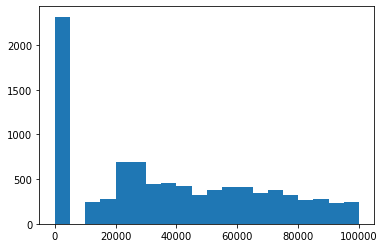

(array([3413., 1302.,  983., 1091., 1127.,  426.,  262.,   48.,   41.,
          39.,  141.,  106.,   38.,   24.,   16.,   29.,   10.,   11.,
          19.,    8.]),
 array([ 61.  ,  72.85,  84.7 ,  96.55, 108.4 , 120.25, 132.1 , 143.95,
        155.8 , 167.65, 179.5 , 191.35, 203.2 , 215.05, 226.9 , 238.75,
        250.6 , 262.45, 274.3 , 286.15, 298.  ]),
 <a list of 20 Patch objects>)

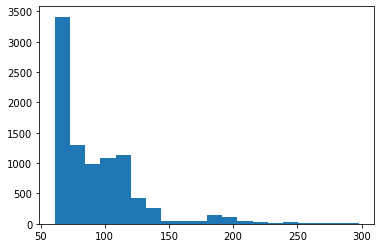

(array([659., 710., 648., 364., 612., 556., 570., 285., 554., 558., 475.,
        231., 451., 450., 422., 182., 407., 372., 317., 311.]),
 array([ 0.  ,  1.75,  3.5 ,  5.25,  7.  ,  8.75, 10.5 , 12.25, 14.  ,
        15.75, 17.5 , 19.25, 21.  , 22.75, 24.5 , 26.25, 28.  , 29.75,
        31.5 , 33.25, 35.  ]),
 <a list of 20 Patch objects>)

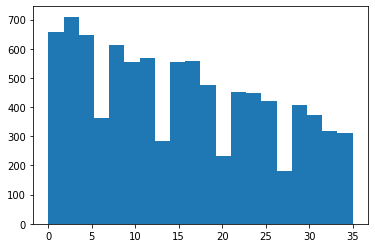

(array([462., 416., 482., 476., 471., 467., 487., 497., 494., 466., 495.,
        505., 513., 435., 482., 462., 380., 421., 395., 328.]),
 array([ 0.  ,  4.95,  9.9 , 14.85, 19.8 , 24.75, 29.7 , 34.65, 39.6 ,
        44.55, 49.5 , 54.45, 59.4 , 64.35, 69.3 , 74.25, 79.2 , 84.15,
        89.1 , 94.05, 99.  ]),
 <a list of 20 Patch objects>)

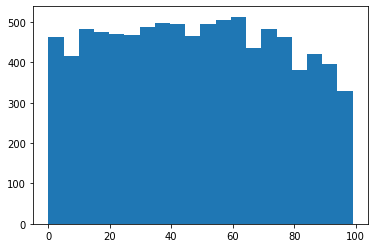

(array([7252.,    0.,    0.,    0., 1011.,    0.,    0.,    0.,  374.,
           0.,    0.,    0.,  292.,    0.,    0.,    0.,  149.,    0.,
           0.,   56.]),
 array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 ,
        2.75, 3.  , 3.25, 3.5 , 3.75, 4.  , 4.25, 4.5 , 4.75, 5.  ]),
 <a list of 20 Patch objects>)

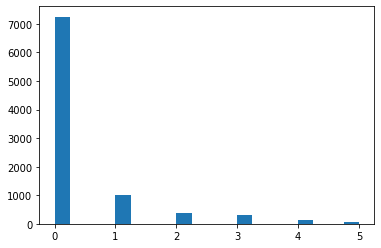

(array([3251.,    0., 2294.,    0.,    0., 1168.,    0.,  409.,    0.,
           0.,  407.,    0.,  372.,    0.,    0.,  433.,    0.,  384.,
           0.,  416.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. , 5.4, 5.8,
        6.2, 6.6, 7. , 7.4, 7.8, 8.2, 8.6, 9. ]),
 <a list of 20 Patch objects>)

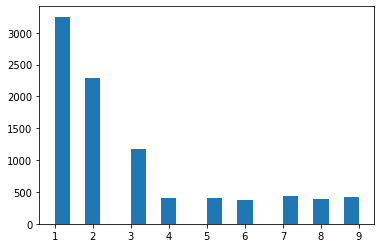

(array([1.279e+03, 1.171e+03, 2.764e+03, 1.971e+03, 8.450e+02, 4.570e+02,
        2.650e+02, 1.210e+02, 1.010e+02, 8.200e+01, 2.500e+01, 1.100e+01,
        1.200e+01, 1.100e+01, 8.000e+00, 5.000e+00, 3.000e+00, 1.000e+00,
        0.000e+00, 2.000e+00]),
 array([9.90070000e-02, 1.44756041e+02, 2.89413074e+02, 4.34070108e+02,
        5.78727141e+02, 7.23384175e+02, 8.68041208e+02, 1.01269824e+03,
        1.15735528e+03, 1.30201231e+03, 1.44666934e+03, 1.59132638e+03,
        1.73598341e+03, 1.88064044e+03, 2.02529748e+03, 2.16995451e+03,
        2.31461154e+03, 2.45926858e+03, 2.60392561e+03, 2.74858264e+03,
        2.89323968e+03]),
 <a list of 20 Patch objects>)

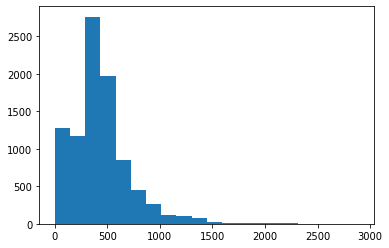

In [468]:
#using matplotlib to create histograms:
%matplotlib inline
#plt.hist(numerical['Monthly Premium Auto'],bins=3)
#plt.show

for i in range(8):
  plt.hist(numerical.iloc[:,i],bins=20)
  #plt.hist(numerical[i],bins=3)
  plt.show()

None of them are normal distributions. But there are a couple in there that could be transformed into normal distributions by using some of the methods we know.

3. For the numerical variables, check the multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable.

In [469]:
#target variable is total_claim_amount so it is a label, so we should drop it.

numerical1 = numerical.drop(['Total Claim Amount'], axis=1)
numerical1.columns

Index(['Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'months',
       'response rate'],
      dtype='object')

In [470]:
correlations_matrix = numerical1.corr()
correlations_matrix

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,months,response rate
Customer Lifetime Value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,-0.006096,-0.008930
Income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,0.000169,0.011932
Monthly Premium Auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.011467,0.010966
Months Since Last Claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,-0.020921,-0.016597
Months Since Policy Inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.011010,0.002952
Number of Open Complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.006335,-0.009881
Number of Policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,0.009305,-0.020891
months,-0.006096,0.000169,0.011467,-0.020921,0.011010,-0.006335,0.009305,1.000000,-0.034221
response rate,-0.008930,0.011932,0.010966,-0.016597,0.002952,-0.009881,-0.020891,-0.034221,1.000000


In [471]:
#checking multicollinearty with VIF
import pandas.util.testing as tm
from statsmodels.stats.outliers_influence import variance_inflation_factor
#creating VIF dataframe
vif_data = pd.DataFrame()
vif_data['feature'] = numerical1.columns

#calculating VIF for each feature

vif_data['VIF'] = [variance_inflation_factor(numerical1.values,i) for i in range(len(numerical1.columns))]

print(vif_data)


                         feature       VIF
0        Customer Lifetime Value  2.806485
1                         Income  2.369922
2           Monthly Premium Auto  7.662958
3        Months Since Last Claim  2.916716
4  Months Since Policy Inception  3.521986
5      Number of Open Complaints  1.170289
6             Number of Policies  2.386211
7                         months  6.452077
8                  response rate  1.157929


A greater VIF means greater correlation. This is because it is inversely proportional to 1-R^2. VIF above 5 indicates a high multicollinearity. From the VIF calcualted above, only "Monthly Premium auto" has value over 5 (its about 6.419968). This suggests that Monthly Premium Auto might be highly multicollinear.

Collinearity is a linear association between two predictors. Multicollinearity is a situation where two or more predictors are highly linearly related. In general, an absolute correlation coefficient of >0.7 among two or more predictors indicates the presence of multicollinearity.


**Task** Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features

<Figure size 864x360 with 0 Axes>

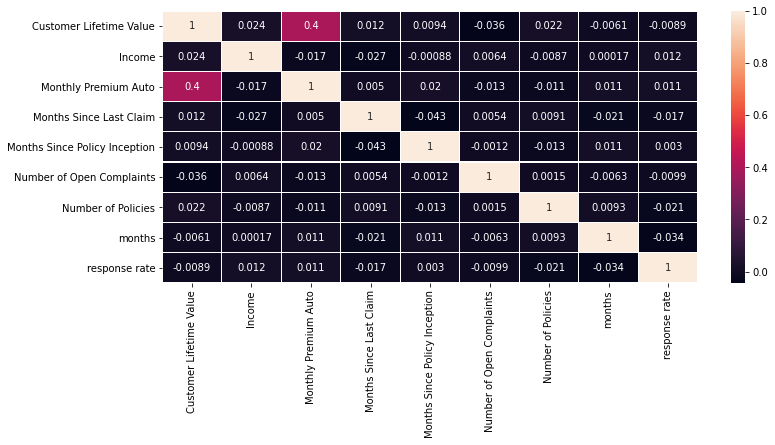

In [ ]:
#creating heatmap
plt.figure(figsize = (12,5))
sns.heatmap(correlations_matrix,annot =True, linewidths =.10, data=numerical1)
plt.show()

Do not see any values that are greater than 0.9. So deciding not to drop anything.

#**Lab | Customer Analysis Round 5**

**Processing Data**
(Further processing...)


**1. X-y split.**

In [472]:
y=numerical['Total Claim Amount']
X=numerical1

X

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,months,response rate
0,2763.519279,56274,69,32,5,0,1,2,0
1,6979.535903,0,94,13,42,0,8,1,0
2,12887.431650,48767,108,18,38,0,2,2,0
3,7645.861827,0,106,18,65,0,7,1,0
4,2813.692575,43836,73,12,44,0,1,2,0
...,...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,2,0
9130,3096.511217,21604,79,14,28,0,1,2,1
9131,8163.890428,0,85,9,37,3,2,2,0
9132,7524.442436,21941,96,34,3,0,3,2,0


In [474]:
from sklearn import linear_model

model = linear_model.LinearRegression()
model = model.fit(X,y)
print(model.intercept_)
print(model.coef_)

70.74766719663603
[-6.65502354e-04 -3.29501568e-03  5.34054887e+00 -1.39399075e-01
 -1.02578362e-01 -1.32659492e+00  2.82426486e-01 -2.16972374e-02
  1.14996987e+01]


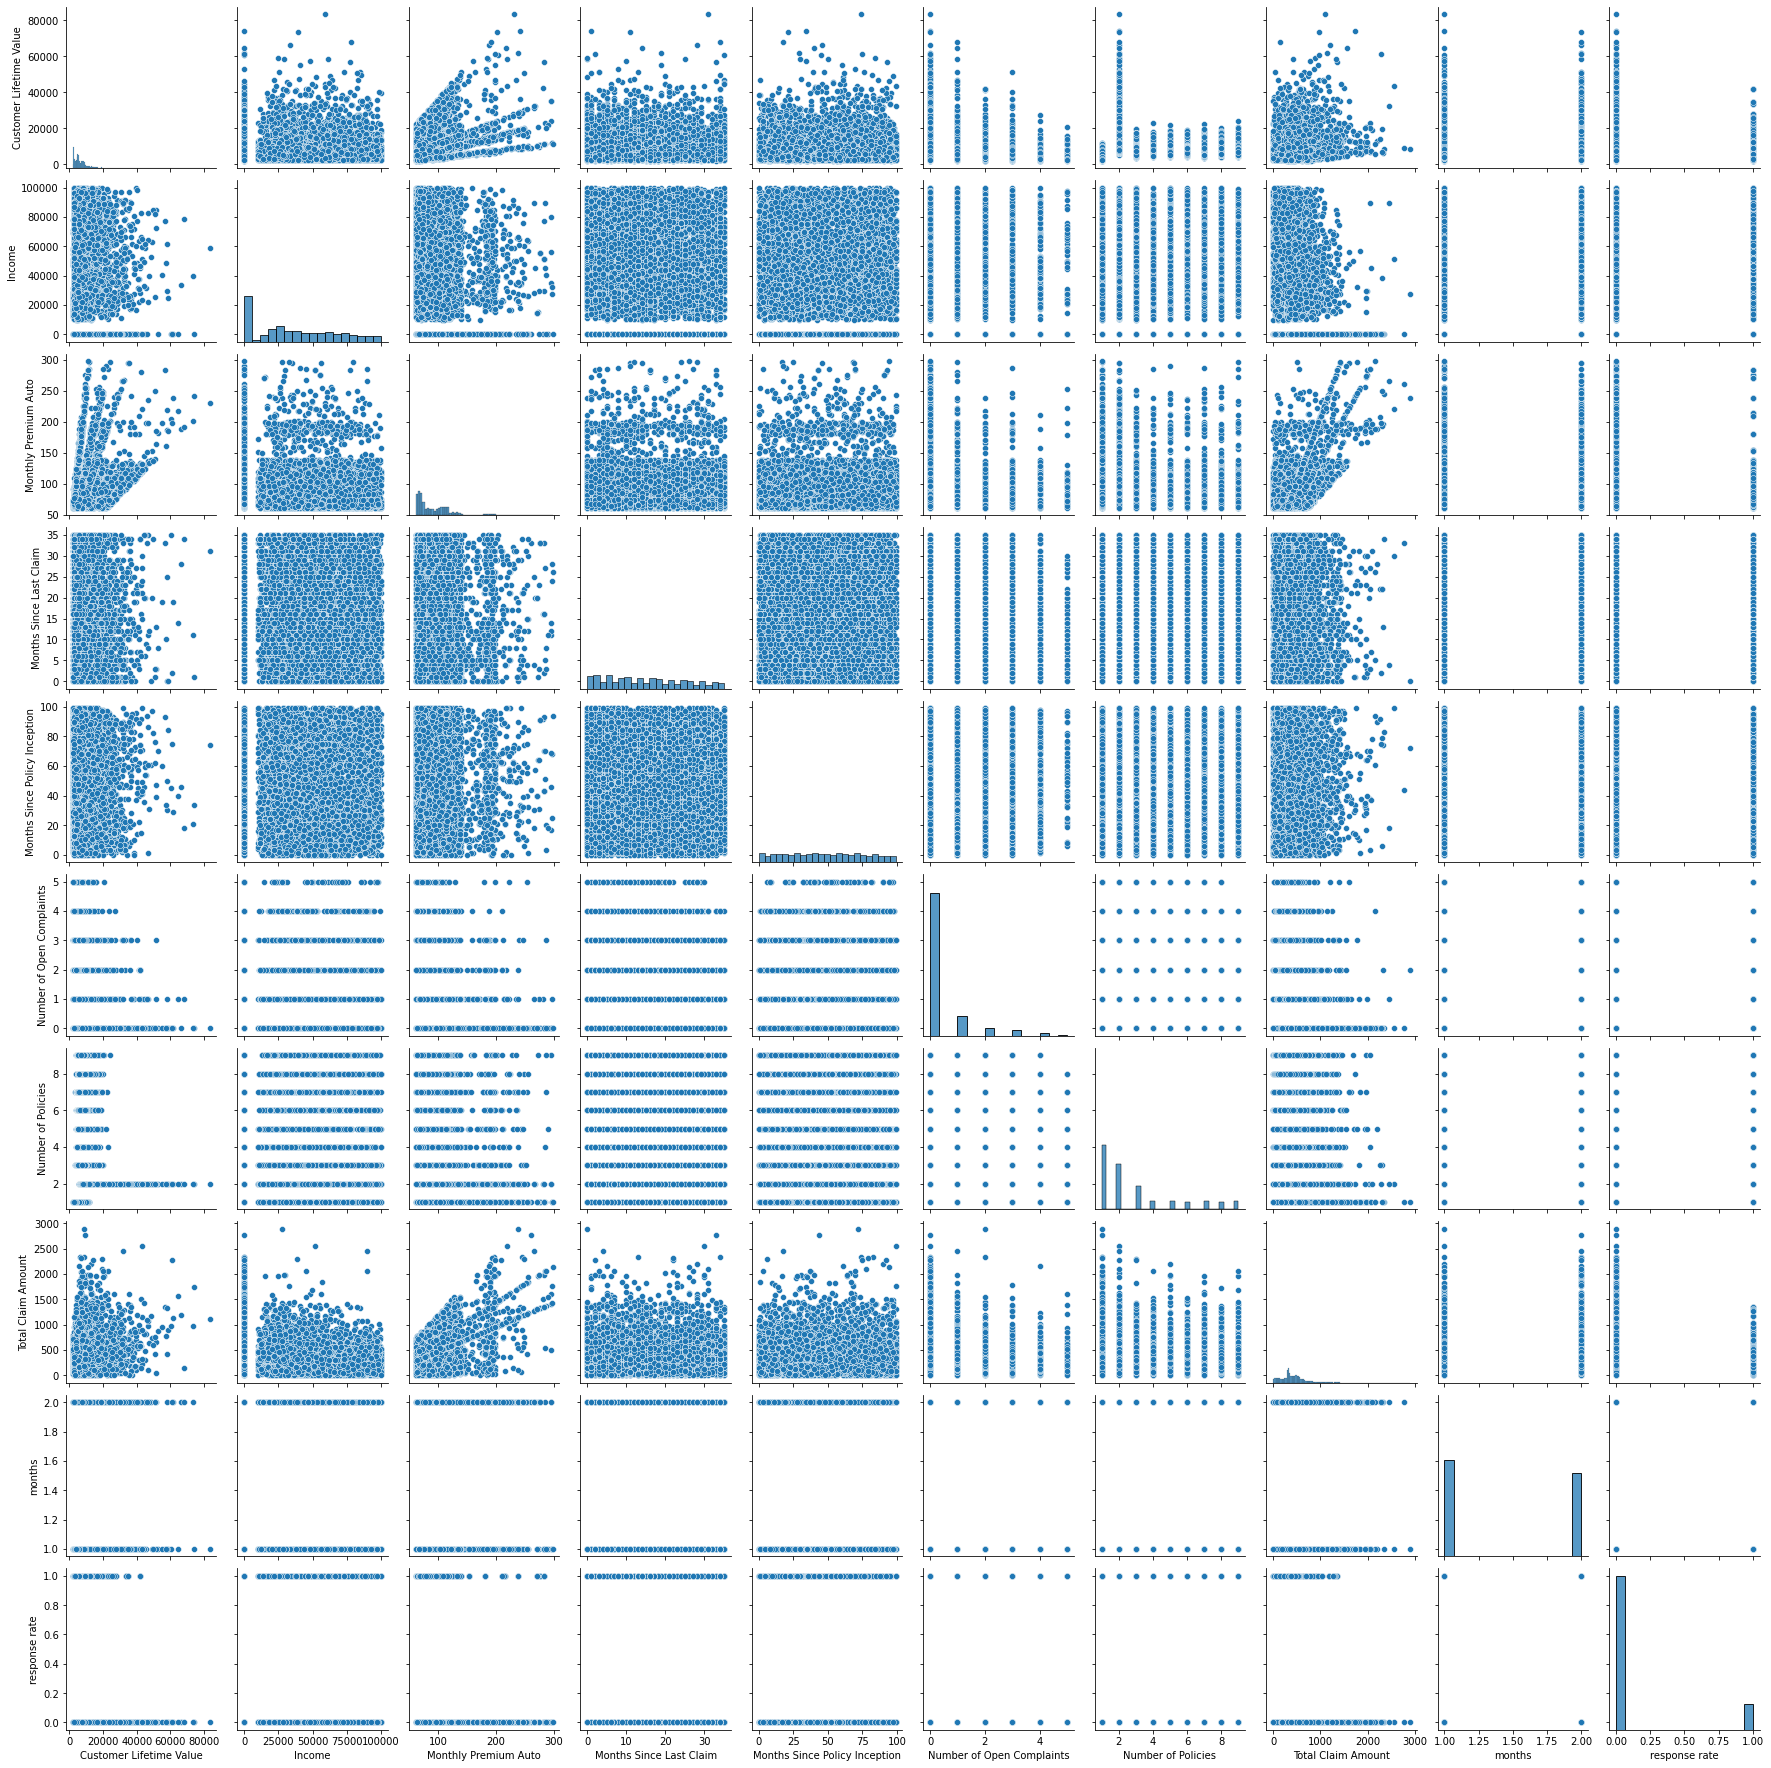

In [475]:
sns.pairplot(numerical)
plt.show()

In [476]:
numerical1.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,months,response rate
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,1.463762,0.143201
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,0.498712,0.350297
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,1.000000,0.000000
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,1.000000,0.000000
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,2.000000,0.000000
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2.000000,1.000000


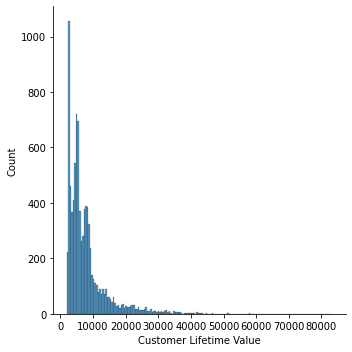

In [477]:
sns.displot(numerical1['Customer Lifetime Value'])
plt.show()

2. Normalize (numerical).

In [478]:
#importing libraries needed

from sklearn.preprocessing import MinMaxScaler #map min value to 0 and max value to 1
from sklearn.preprocessing import StandardScaler #for each value it will subtract the mean value, shifts the axis, and the ..

In [479]:
#using MinMaxScaler to scale it between values 0 and 1

#using numerical1 variable here because we are trying to predict values for 'Total claim Amount', if we have that column scaled as well, we would need to scale it back later to get accurate predicted values.
#it does not make sense to give predicted values between 0 and 1 to clients or boss.
transformer = MinMaxScaler().fit(numerical1)
x_normalized = transformer.transform(numerical1)
print(x_normalized.shape)
x_normalized = pd.DataFrame(x_normalized,columns=numerical1.columns) 
x_normalized.head()

(9134, 9)


,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,months,response rate
0,0.010629,0.562847,0.033755,0.914286,0.050505,0.0,0.000,1.0,0.0
1,0.062406,0.000000,0.139241,0.371429,0.424242,0.0,0.875,0.0,0.0
2,0.134960,0.487763,0.198312,0.514286,0.383838,0.0,0.125,1.0,0.0
3,0.070589,0.000000,0.189873,0.514286,0.656566,0.0,0.750,0.0,0.0
4,0.011245,0.438443,0.050633,0.342857,0.444444,0.0,0.000,1.0,0.0


In [480]:
transformer = StandardScaler().fit(numerical1)
x_standardized = transformer.transform(numerical1)
print(x_standardized.shape)
x_standardized = pd.DataFrame(x_standardized,columns=numerical1.columns)
x_standardized.head()
#output will standardize values 

(9134, 9)


,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,months,response rate
0,-0.762878,0.612827,-0.703925,1.678099,-1.543287,-0.42225,-0.822648,1.075304,-0.408822
1,-0.149245,-1.239617,0.022691,-0.208186,-0.217334,-0.42225,2.106160,-0.929969,-0.408822
2,0.710636,0.365710,0.429596,0.288205,-0.360680,-0.42225,-0.404247,1.075304,-0.408822
3,-0.052263,-1.239617,0.371467,0.288205,0.606907,-0.42225,1.687759,-0.929969,-0.408822
4,-0.755575,0.203390,-0.587666,-0.307465,-0.145661,-0.42225,-0.822648,1.075304,-0.408822


# **Lab| Customer Analysis Round 6**

**Processing Data**

1. **One Hot or Label Encoding**

In [481]:
categorical.head()
X_cat = categorical

,Customer,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [482]:
#Using OneHotEncoder to get categorical variables into multiple numerical columns
X_cat1=X_cat.drop(['Customer','State','Response','EmploymentStatus','Education','Gender','Location Code','Marital Status','Policy Type','Policy','Renew Offer Type','Sales Channel','Vehicle Class','Vehicle Size'],axis=1)
#import OneHotEncoder, assign encoder to fit of X_cat
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder().fit(X_cat1)
#Printing categories to see how the values of these variables look like
print(encoder.categories_)


[array(['Basic', 'Extended', 'Premium'], dtype=object)]


In [483]:
#some of the above results look quite different. Counting unique values for these:
#X_cat1=X_cat.drop(['Customer','State','Response','Coverage','Education','Gender','Location Code','Marital Status','Policy Type','Policy','Renew Offer Type','Sales Channel','Vehicle Class','Vehicle Size'],axis=1)

#viewing X_cat1
X_cat1.head()

,Coverage
0,Basic
1,Extended
2,Premium
3,Basic
4,Basic


In [484]:
#assign variable encoded to transform and convert to array
encoded = encoder.transform(X_cat1).toarray()
print(encoded)
#create a dataframe with columns with 
onehot_encoded = pd.DataFrame(encoded,columns=encoder.categories_)
onehot_encoded.head()

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 ...
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


,Basic,Extended,Premium
0,1.0,0.0,0.0
1,0.0,1.0,0.0
2,0.0,0.0,1.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


In [485]:
#Using OneHotEncoder to get categorical variables into multiple numerical columns
X_cat2=X_cat.drop(['Customer','State','Response','Coverage','Education','Gender','Location Code','Marital Status','Policy Type','Policy','Renew Offer Type','Sales Channel','Vehicle Class','Vehicle Size'],axis=1)
#import OneHotEncoder, assign encoder to fit of X_cat
from sklearn.preprocessing import OneHotEncoder
encoder2 = OneHotEncoder().fit(X_cat2)
#Printing categories to see how the values of these variables look like
print(encoder2.categories_)

[array(['Disabled', 'Employed', 'Medical Leave', 'Retired', 'Unemployed'],
      dtype=object)]


In [486]:
encoded1 = encoder2.transform(X_cat2).toarray()
print(encoded1)
#create a dataframe with columns with 
onehot_encoded1 = pd.DataFrame(encoded1,columns=encoder2.categories_)
onehot_encoded1.head()

[[0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]]


,Disabled,Employed,Medical Leave,Retired,Unemployed
0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0


2. **Concat DataFrames**

In [546]:
#we can drop one axis from each of these so our dataframes are nice and clean before concatenating
#we can drop it because we can still deduce one of the variables from others

#onehot_encoded = onehot_encoded.drop(['Extended'],axis=1) #it's deleted already so that it doesn't give error
onehot_encoded.head()


,Basic,Extended,Premium
0,1.0,0.0,0.0
1,0.0,1.0,0.0
2,0.0,0.0,1.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


In [549]:
#onehot_encoded1 = onehot_encoded1.drop(['Disabled'],axis=1) #it's deleted already so that it doesn't give error
onehot_encoded1.head()

,Employed,Medical Leave,Retired,Unemployed
0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0


In [550]:
# let's merge all this information together into a single dataset with all features, now numerical
X = pd.concat([x_normalized,onehot_encoded], axis=1)
#X = X.rename(columns={("Basic,"):"Basic Coverage",("Premium,"):"Premium Coverage"},inplace=True)
#X = X.drop(["Total Claim Amount"],axis=1)

X.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,months,response rate,"(Basic,)","(Extended,)","(Premium,)"
0,0.010629,0.562847,0.033755,0.914286,0.050505,0.0,0.000,1.0,0.0,1.0,0.0,0.0
1,0.062406,0.000000,0.139241,0.371429,0.424242,0.0,0.875,0.0,0.0,0.0,1.0,0.0
2,0.134960,0.487763,0.198312,0.514286,0.383838,0.0,0.125,1.0,0.0,0.0,0.0,1.0
3,0.070589,0.000000,0.189873,0.514286,0.656566,0.0,0.750,0.0,0.0,1.0,0.0,0.0
4,0.011245,0.438443,0.050633,0.342857,0.444444,0.0,0.000,1.0,0.0,1.0,0.0,0.0


In [551]:
#assigning y to target variable
y = numerical['Total Claim Amount']
y.head()

0     384.811147
1    1131.464935
2     566.472247
3     529.881344
4     138.130879
Name: Total Claim Amount, dtype: float64

In [552]:
#dropping total claim amount so our model is not finding the exact answer
#X = X.drop(["Total Claim Amount"],axis=1)

X.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,months,response rate,"(Basic,)","(Extended,)","(Premium,)"
0,0.010629,0.562847,0.033755,0.914286,0.050505,0.0,0.000,1.0,0.0,1.0,0.0,0.0
1,0.062406,0.000000,0.139241,0.371429,0.424242,0.0,0.875,0.0,0.0,0.0,1.0,0.0
2,0.134960,0.487763,0.198312,0.514286,0.383838,0.0,0.125,1.0,0.0,0.0,0.0,1.0
3,0.070589,0.000000,0.189873,0.514286,0.656566,0.0,0.750,0.0,0.0,1.0,0.0,0.0
4,0.011245,0.438443,0.050633,0.342857,0.444444,0.0,0.000,1.0,0.0,1.0,0.0,0.0


In [553]:
#doing the same for second
X1 = pd.concat([x_normalized, onehot_encoded1], axis=1)
#X1 = X1.drop(["Total Claim Amount"],axis=1)
X1.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,months,response rate,"(Employed,)","(Medical Leave,)","(Retired,)","(Unemployed,)"
0,0.010629,0.562847,0.033755,0.914286,0.050505,0.0,0.000,1.0,0.0,1.0,0.0,0.0,0.0
1,0.062406,0.000000,0.139241,0.371429,0.424242,0.0,0.875,0.0,0.0,0.0,0.0,0.0,1.0
2,0.134960,0.487763,0.198312,0.514286,0.383838,0.0,0.125,1.0,0.0,1.0,0.0,0.0,0.0
3,0.070589,0.000000,0.189873,0.514286,0.656566,0.0,0.750,0.0,0.0,0.0,0.0,0.0,1.0
4,0.011245,0.438443,0.050633,0.342857,0.444444,0.0,0.000,1.0,0.0,1.0,0.0,0.0,0.0


In [554]:
#X1 = X1.drop(["Total Claim Amount"],axis=1)
X1.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,months,response rate,"(Employed,)","(Medical Leave,)","(Retired,)","(Unemployed,)"
0,0.010629,0.562847,0.033755,0.914286,0.050505,0.0,0.000,1.0,0.0,1.0,0.0,0.0,0.0
1,0.062406,0.000000,0.139241,0.371429,0.424242,0.0,0.875,0.0,0.0,0.0,0.0,0.0,1.0
2,0.134960,0.487763,0.198312,0.514286,0.383838,0.0,0.125,1.0,0.0,1.0,0.0,0.0,0.0
3,0.070589,0.000000,0.189873,0.514286,0.656566,0.0,0.750,0.0,0.0,0.0,0.0,0.0,1.0
4,0.011245,0.438443,0.050633,0.342857,0.444444,0.0,0.000,1.0,0.0,1.0,0.0,0.0,0.0


In [555]:
X2 = pd.concat([x_normalized,onehot_encoded,onehot_encoded1], axis=1)
#X2 = X2.drop(["Total Claim Amount"],axis=1)
X2.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,months,response rate,"(Basic,)","(Extended,)","(Premium,)","(Employed,)","(Medical Leave,)","(Retired,)","(Unemployed,)"
0,0.010629,0.562847,0.033755,0.914286,0.050505,0.0,0.000,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.062406,0.000000,0.139241,0.371429,0.424242,0.0,0.875,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.134960,0.487763,0.198312,0.514286,0.383838,0.0,0.125,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,0.070589,0.000000,0.189873,0.514286,0.656566,0.0,0.750,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.011245,0.438443,0.050633,0.342857,0.444444,0.0,0.000,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [556]:
#X2 = X2.drop(["Total Claim Amount"],axis=1)
X2.head(2)

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,months,response rate,"(Basic,)","(Extended,)","(Premium,)","(Employed,)","(Medical Leave,)","(Retired,)","(Unemployed,)"
0,0.010629,0.562847,0.033755,0.914286,0.050505,0.0,0.000,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.062406,0.000000,0.139241,0.371429,0.424242,0.0,0.875,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [557]:
#I am going to test for each X, X1 and X2 to see how modeling and predictions change with different features or combinations of them.
#because i am curious
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size =0.2, random_state=100)
X1_train,X1_test,y_train,y_test = train_test_split(X1,y, test_size =0.2, random_state=100)
X2_train,X2_test,y_train,y_test = train_test_split(X2,y, test_size =0.2, random_state=100)

In [558]:
#printing shape for each of these three

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print("          ")
print("----------")
print("          ")
print(X1_train.shape)
print(X1_test.shape)
print(y_train.shape)
print(y_test.shape)
print("          ")
print("----------")
print("          ")
print(X2_train.shape)
print(X2_test.shape)
print(y_train.shape)
print(y_test.shape)

(7307, 12)
(1827, 12)
(7307,)
(1827,)
          
----------
          
(7307, 13)
(1827, 13)
(7307,)
(1827,)
          
----------
          
(7307, 16)
(1827, 16)
(7307,)
(1827,)


In [559]:
#checking for X
X_train.head(2)

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,months,response rate,"(Basic,)","(Extended,)","(Premium,)"
7706,0.016790,0.258249,0.088608,0.285714,0.696970,0.0,0.000,0.0,1.0,0.0,1.0,0.0
779,0.115687,0.792851,0.143460,0.800000,0.616162,0.6,0.125,0.0,0.0,0.0,1.0,0.0


In [560]:
y_train.head(2)

7706    393.6
779     456.0
Name: Total Claim Amount, dtype: float64

In [561]:
X_test.head(2)

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,months,response rate,"(Basic,)","(Extended,)","(Premium,)"
7175,0.039478,0.565978,0.016878,0.114286,0.888889,0.2,0.625,0.0,0.0,1.0,0.0,0.0
7255,0.036650,0.212400,0.261603,0.085714,0.121212,0.0,0.000,1.0,0.0,0.0,1.0,0.0


In [562]:
y_test.head(2)

7175    312.000000
7255    131.262395
Name: Total Claim Amount, dtype: float64

On all outputs indexes are same, so it looks like it has worked for X, assuming the same happened for X1 and X2 as the codes are same.

**Linear Regression**

In [565]:
#training/fitting models

model = linear_model.LinearRegression()
model = model.fit(X_train,y_train)

modelA = linear_model.LinearRegression()
modelA = modelA.fit(X1_train,y_train)

modelB = linear_model.LinearRegression()
modelB = modelB.fit(X2_train,y_train)


In [566]:
#Models have been fitted

**Model Validation**

**R2**


In [567]:
#Now checking if the model is validated. 

#checking test portion of dataset scores and comparing:

model.predict(X_test)

array([222.60319486, 649.93523447, 316.38896943, ..., 132.25270208,
       698.90673037, 334.24760131])

In [568]:
modelA.predict(X1_test)

array([202.59415437, 585.95073784, 259.60913536, ..., 170.12346556,
       730.12789149, 273.16677542])

In [569]:
modelB.predict(X2_test)

array([205.57044457, 577.24469427, 262.81950951, ..., 172.53242587,
       733.86863468, 276.49552277])

In [570]:
#checking the prediction score for each of these models
from sklearn.metrics import r2_score

prediction1 = model.predict(X_test)
r2_score(y_test,prediction1)


0.4748601687628351

In [571]:
prediction2 = modelA.predict(X1_test)
r2_score(y_test,prediction2)

0.4877505519015881

In [572]:
prediction3 = modelB.predict(X2_test)
r2scoreprev= r2_score(y_test,prediction3)
r2_score(y_test,prediction3)

0.4890610390060556

**MSE.**


In [510]:
#import mean_squarer error from sklearn.metrics
from sklearn.metrics import mean_squared_error
mse_model = mean_squared_error(y_test,prediction1)
mse_modelA = mean_squared_error(y_test,prediction2)
mse_modelB = mean_squared_error(y_test,prediction3)

print("MSE for prediction 1(model):   ",mse_model)
print("MSE for prediction 2(modelA):   ",mse_modelA)
print("MSE for prediction 3(modelB):   ",mse_modelB)

MSE for prediction 1(model):    41828.53395726324
MSE for prediction 2(modelA):    40801.78680008948
MSE for prediction 3(modelB):    40697.40364137796


**RMSE.**


In [511]:
#calculation RMSE(it's just the square root of MSE)
import math
rmse_model = math.sqrt(mse_model)
rmse_modelA = math.sqrt(mse_modelA)
rmse_modelB = math.sqrt(mse_modelB)

print("RMSE for prediction 1(model):   ",rmse_model)
print("RMSE for prediction 2(modelA):   ",rmse_modelA)
print("RMSE for prediction 3(modelB):   ",rmse_modelB)

RMSE for prediction 1(model):    204.5202531713259
RMSE for prediction 2(modelA):    201.99452170811335
RMSE for prediction 3(modelB):    201.7359750797511


**MAE.**

In [512]:
#mae is the mean absoluter error, importing relevant library from sklearn

from sklearn.metrics import mean_absolute_error
mae_model = mean_absolute_error(y_test,prediction1)
mae_modelA = mean_absolute_error(y_test,prediction2)
mae_modelB = mean_absolute_error(y_test,prediction3)

print("MAE for prediction 1(model):   ",mae_model)
print("MAE for prediction 2(modelA):   ",mae_modelA)
print("MAE for prediction 3(modelB):   ",mae_modelB)

MAE for prediction 1(model):    148.05554723528942
MAE for prediction 2(modelA):    148.04352566168518
MAE for prediction 3(modelB):    147.6766222209735


# **Lab| Customer Analysis Round 7**

**Improving the linear regression model**

**Finding: Noticed from my models:** (model, modelA and modelB)

The r2_score increases as we add more categorical variables and errors (mse,rmse and mae) decrease as we add more categorical variables. So first, I will try to improve the performance of the model by adding other categorical variables.

In [513]:
X_cat.head()
#X_cat.isna()
#X_cat.shape()--typed this to check why i was getting errors later, it stores it as a tuple.

,Customer,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [514]:
#looking at categorical columns, it looks like each index of the column customer is a separate individual. Checking if that is true

#we are mostly interested in customers as a group, meaning if they are in the same state, or what level of employment status they have, how do they claim and what amounts they claim.

#if we wanted to find individual customers details, we could just look into the database and find their values.
X_cat['Customer'].shape
print("    ")
print("------")
print("    ")
X_cat['Customer'].value_counts()

(9134,)

    
------
    


PR53785    1
XX88364    1
ZI69514    1
TZ60132    1
RF72106    1
          ..
HD44279    1
ZS32263    1
PR22184    1
JG83075    1
WH36609    1
Name: Customer, Length: 9134, dtype: int64

**Finding** There are unique 9134 customers and their count is 1 individually. It does not make sense to include them in the analysis. I am going to drop this variable in the following stops by simply not including this variable.

In the lab part 6, my modelB was using concatenated version (numerical columns+coverage+employment status) as dataframe X2. So I am going to add other categorical variables to this one in the next steps.

In [515]:
#first I am going to assign all of these variables separately, i tried several ways to do all of them at once with one hot encoder, but got several types of error so doing them separately

#categorical variables that are related to demogr
X_cat_state = X_cat[['State']]
X_cat_education = X_cat[['Education']]
X_cat_gender = X_cat[['Gender']]
X_cat_location = X_cat[['Location Code']]
X_cat_marital = X_cat[['Marital Status']]

#categorical variables that are related to what the company offers- policy, offers, policies dependant on vehicle class and size. response is also added here
X_cat_response = X_cat[['Response']]
X_cat_renew = X_cat[['Renew Offer Type']]
X_cat_vehicle_s = X_cat[['Vehicle Size']]
X_cat_vehicle_c = X_cat[['Vehicle Class']]
#policy type and policy looks interrelated (as Policy type (Corporate)--> policy (corporate L3), so if policy is corporate L3, we can always tell it is a corporate policy type)
#for this reason I am going to take only policy type as it will otherwise give us redundant information.
X_cat_policyt = X_cat[['Policy Type']]


In [516]:
X_cat['Vehicle Size'].value_counts()
print("    ")
print("------")
print("    ")
X_cat['Vehicle Class'].value_counts()
print("    ")
print("------")
print("    ")
X_cat['Vehicle Class'].groupby(X_cat['Vehicle Size']).value_counts()
#using group by vehicle Size to see if vehicle class is interrelated to vehicle class

Medsize    6424
Small      1764
Large       946
Name: Vehicle Size, dtype: int64

    
------
    


Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury SUV        184
Luxury Car        163
Name: Vehicle Class, dtype: int64

    
------
    


Vehicle Size  Vehicle Class
Large         Four-Door Car     475
              Two-Door Car      221
              SUV               167
              Sports Car         49
              Luxury SUV         18
              Luxury Car         16
Medsize       Four-Door Car    3237
              SUV              1308
              Two-Door Car     1282
              Sports Car        366
              Luxury SUV        125
              Luxury Car        106
Small         Four-Door Car     909
              Two-Door Car      383
              SUV               321
              Sports Car         69
              Luxury Car         41
              Luxury SUV         41
Name: Vehicle Class, dtype: int64

In [517]:
#double-checking if my assumptions with policy and policy type were true
X_cat['Policy'].groupby(X_cat['Policy Type']).value_counts()

#they were correct, so not adding them back.

Policy Type     Policy      
Corporate Auto  Corporate L3    1014
                Corporate L2     595
                Corporate L1     359
Personal Auto   Personal L3     3426
                Personal L2     2122
                Personal L1     1240
Special Auto    Special L2       164
                Special L3       148
                Special L1        66
Name: Policy, dtype: int64

In [518]:
X_cat['Location Code'].groupby(X_cat['State']).value_counts() #location code cannot really be attritbuted back to individual states, so I am going to keep them

X_cat['State'].groupby(X_cat['Location Code']).value_counts() #vice-versa also seems to be true from the output below

State       Location Code
Arizona     Suburban         1080
            Rural             325
            Urban             298
California  Suburban         1997
            Rural             604
            Urban             549
Nevada      Suburban          550
            Rural             180
            Urban             152
Oregon      Suburban         1640
            Rural             513
            Urban             448
Washington  Suburban          512
            Rural             151
            Urban             135
Name: Location Code, dtype: int64

Location Code  State     
Rural          California     604
               Oregon         513
               Arizona        325
               Nevada         180
               Washington     151
Suburban       California    1997
               Oregon        1640
               Arizona       1080
               Nevada         550
               Washington     512
Urban          California     549
               Oregon         448
               Arizona        298
               Nevada         152
               Washington     135
Name: State, dtype: int64

In [519]:
#running OneHotEncoder on each of these dfs I have created.
#categorical variables that are related to demographics

encoder_state = OneHotEncoder().fit(X_cat_state)
encoder_education = OneHotEncoder().fit(X_cat_education)
encoder_gender = OneHotEncoder().fit(X_cat_gender)
encoder_location = OneHotEncoder().fit(X_cat_location)
encoder_marital = OneHotEncoder().fit(X_cat_marital)


#categorical variables that are related to what the company offers- policy, offers, policies dependant on vehicle class and size; response is also added here
encoder_response = OneHotEncoder().fit(X_cat_response)
encoder_renew = OneHotEncoder().fit(X_cat_renew)
encoder_vehicle_s = OneHotEncoder().fit(X_cat_vehicle_s)
encoder_vehicle_c = OneHotEncoder().fit(X_cat_vehicle_c)
encoder_policyt = OneHotEncoder().fit(X_cat_policyt)


In [520]:
#Printing categories to see how the values of these variables look like
print("Demographic categorical variables:  ")
print("    ")
print("------")
print("    ")
print(encoder_state.categories_)
print("    ")
print("------")
print("    ")
print(encoder_response.categories_)
print("    ")
print("------")
print("    ")
print(encoder_education.categories_)
print("    ")
print("------")
print("    ")
print(encoder_gender.categories_)
print("    ")
print("------")
print("    ")
print(encoder_location.categories_)
print("    ")
print("------")
print("    ")
print(encoder_marital.categories_)
print("    ")
print("------")
print("    ")
print("Company/Policy related categorical variables:  ")
print("    ")
print("------")
print("    ")
print(encoder_renew.categories_)
print("    ")
print("------")
print("    ")
print(encoder_vehicle_s.categories_)
print("    ")
print("------")
print("    ")
print(encoder_vehicle_c.categories_)
print("    ")
print("------")
print("    ")
print(encoder_policyt.categories_)
print("    ")
print("------")
print("    ")

Demographic categorical variables:  
    
------
    
[array(['Arizona', 'California', 'Nevada', 'Oregon', 'Washington'],
      dtype=object)]
    
------
    
[array(['No', 'Yes'], dtype=object)]
    
------
    
[array(['Bachelor', 'College', 'Doctor', 'High School or Below', 'Master'],
      dtype=object)]
    
------
    
[array(['F', 'M'], dtype=object)]
    
------
    
[array(['Rural', 'Suburban', 'Urban'], dtype=object)]
    
------
    
[array(['Divorced', 'Married', 'Single'], dtype=object)]
    
------
    
Company/Policy related categorical variables:  
    
------
    
[array(['Offer1', 'Offer2', 'Offer3', 'Offer4'], dtype=object)]
    
------
    
[array(['Large', 'Medsize', 'Small'], dtype=object)]
    
------
    
[array(['Four-Door Car', 'Luxury Car', 'Luxury SUV', 'SUV', 'Sports Car',
       'Two-Door Car'], dtype=object)]
    
------
    
[array(['Corporate Auto', 'Personal Auto', 'Special Auto'], dtype=object)]
    
------
    


In [521]:
#encoding these categories columns separately into respective array

#demographic variables
encoded_state = encoder_state.transform(X_cat_state).toarray()
encoded_education = encoder_education.transform(X_cat_education).toarray()
encoded_gender = encoder_gender.transform(X_cat_gender).toarray()
encoded_location = encoder_location.transform(X_cat_location).toarray()
encoded_marital = encoder_marital.transform(X_cat_marital).toarray()

#company/policy related variables and response
encoded_renew = encoder_renew.transform(X_cat_renew).toarray()
encoded_response = encoder_response.transform(X_cat_response).toarray()
encoded_vehicle_s = encoder_vehicle_s.transform(X_cat_vehicle_s).toarray()
encoded_vehicle_c = encoder_vehicle_c.transform(X_cat_vehicle_c).toarray()
encoded_policyt = encoder_policyt.transform(X_cat_policyt).toarray()
#printing one of them to check if the above commands stored them into array correctly
print(encoded_state)
#onehot_encoded_all={X_cat:[]}
#now it is is being storied in an array

[[0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 ...
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]


In [522]:
#create a dataframe with columns with these categorical variables

#demographic variables

onehot_encoded_state = pd.DataFrame(encoded_state,columns=encoder_state.categories_)

onehot_encoded_education = pd.DataFrame(encoded_education,columns=encoder_education.categories_)
onehot_encoded_gender = pd.DataFrame(encoded_gender,columns=encoder_gender.categories_)
onehot_encoded_location = pd.DataFrame(encoded_location,columns=encoder_location.categories_)
onehot_encoded_marital = pd.DataFrame(encoded_marital,columns=encoder_marital.categories_)

#company/policy related variables and response
onehot_encoded_renew = pd.DataFrame(encoded_renew,columns=encoder_renew.categories_)
onehot_encoded_response = pd.DataFrame(encoded_response,columns=encoder_response.categories_)
onehot_encoded_vehicle_s = pd.DataFrame(encoded_vehicle_s,columns=encoder_vehicle_s.categories_)
onehot_encoded_vehicle_c = pd.DataFrame(encoded_vehicle_c,columns=encoder_vehicle_c.categories_)
onehot_encoded_policyt = pd.DataFrame(encoded_policyt,columns=encoder_policyt.categories_)

#checking if converting back to DataFrame worked by getting output of one of these
onehot_encoded_vehicle_s.head(2)
#pd.DataFrame(encoded_all,columns=encoder_all.categories_).head()

,Large,Medsize,Small
0,0.0,1.0,0.0
1,0.0,1.0,0.0


In [523]:
#all of the onehot_encoded_variablename will sum up to 1 if i add them across rows, so we can drop one of the columns from each

#demographic variables

onehot_encoded_state = onehot_encoded_state.drop(['Arizona'],axis=1)#- ran it already and it has dropped, if i run it again it will give me error
onehot_encoded_education = onehot_encoded_education.drop(['Bachelor'],axis=1)
#onehot_encoded_gender = onehot_encoded_gender.drop(['M'],axis=1) - again only two categories
onehot_encoded_location = onehot_encoded_location.drop(['Rural'],axis=1)
onehot_encoded_marital = onehot_encoded_marital.drop(['Divorced'],axis=1)

#company/policy related variables and response
onehot_encoded_renew = onehot_encoded_renew.drop(['Offer1'],axis=1)
#onehot_encoded_response = onehot_encoded_state.drop(['Arizona'],axis=1)#- reponse only has two categories so deciding not to drop
onehot_encoded_vehicle_s = onehot_encoded_vehicle_s.drop(['Large'],axis=1)
onehot_encoded_vehicle_c = onehot_encoded_vehicle_c.drop(['SUV'],axis=1)
onehot_encoded_policyt = onehot_encoded_policyt.drop(['Special Auto'],axis=1)

In [524]:
#checking outputs to see if it worked properly
onehot_encoded_state.head(2)
print("    ")
print("------")
print("    ")
onehot_encoded_renew.head(2)

,California,Nevada,Oregon,Washington
0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0


    
------
    


,Offer2,Offer3,Offer4
0,0.0,0.0,0.0
1,0.0,1.0,0.0


**Note:** I could have used LabelEncoder for this above step as well, but it would shrink it down to 1 column for categorical variables and it would have made it numerical(and treated it as a numerical relationship). I am not sure if that would work for this case study, so i have stuck with One_hot_encoder for this one as it could result in unintended consequences.

**Numerical variable types** In the previous model, I used MinMaxScaler, in this one I am going to try StandardScaler to see if it improves the performace.

In [525]:
#already done this before, so just copying it here so i can refer to my variables better:
#transformer = StandardScaler().fit(numerical1)
#x_standardized = transformer.transform(numerical1)
#print(x_standardized.shape)
#x_standardized = pd.DataFrame(x_standardized,columns=numerical1.columns)
#x_standardized.head()
#output will standardize values 


**Concatenating dataframes so i can build new models**

In [526]:
X_demo = pd.concat([x_standardized,onehot_encoded1,onehot_encoded_state,onehot_encoded_education,onehot_encoded_education,onehot_encoded_location,onehot_encoded_marital],axis=1)
#onehot_encoded1 was the one i created earler for employment status variable

X_other = pd.concat([x_standardized,onehot_encoded,onehot_encoded_response,onehot_encoded_renew,onehot_encoded_vehicle_c,onehot_encoded_vehicle_s,onehot_encoded_policyt],axis=1)
#onehot_encoded was the one i created earler for coverage variable

X_all = pd.concat([x_standardized,onehot_encoded1,onehot_encoded_state,onehot_encoded_education,onehot_encoded_education,onehot_encoded_location,onehot_encoded_marital,onehot_encoded,onehot_encoded_response,onehot_encoded_renew,onehot_encoded_vehicle_c,onehot_encoded_vehicle_s,onehot_encoded_policyt],axis=1)
#this model will measure performance if I add all the variables - minus customers

X_compare = pd.concat([x_standardized,onehot_encoded,onehot_encoded1],axis=1)
#I also want to compare if x_standardized will result in better performance in comparison to same experiment we did earlier with x_normalized (this was my modelB), so creating a new one here so i can easily compare them

X_demo.head(2)
X_other.head(2)
X_all.head(2)
X_compare.head(2)

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,months,response rate,"(Employed,)","(Medical Leave,)","(Retired,)","(Unemployed,)","(California,)","(Nevada,)","(Oregon,)","(Washington,)","(College,)","(Doctor,)","(High School or Below,)","(Master,)","(College,)","(Doctor,)","(High School or Below,)","(Master,)","(Suburban,)","(Urban,)","(Married,)","(Single,)"
0,-0.762878,0.612827,-0.703925,1.678099,-1.543287,-0.42225,-0.822648,1.075304,-0.408822,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,-0.149245,-1.239617,0.022691,-0.208186,-0.217334,-0.42225,2.106160,-0.929969,-0.408822,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,months,response rate,"(Basic,)","(Extended,)","(Premium,)","(No,)","(Yes,)","(Offer2,)","(Offer3,)","(Offer4,)","(Four-Door Car,)","(Luxury Car,)","(Luxury SUV,)","(Sports Car,)","(Two-Door Car,)","(Medsize,)","(Small,)","(Corporate Auto,)","(Personal Auto,)"
0,-0.762878,0.612827,-0.703925,1.678099,-1.543287,-0.42225,-0.822648,1.075304,-0.408822,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
1,-0.149245,-1.239617,0.022691,-0.208186,-0.217334,-0.42225,2.106160,-0.929969,-0.408822,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,months,response rate,"(Employed,)","(Medical Leave,)","(Retired,)","(Unemployed,)","(California,)","(Nevada,)","(Oregon,)","(Washington,)","(College,)","(Doctor,)","(High School or Below,)","(Master,)","(College,)","(Doctor,)","(High School or Below,)","(Master,)","(Suburban,)","(Urban,)","(Married,)","(Single,)","(Basic,)","(Extended,)","(Premium,)","(No,)","(Yes,)","(Offer2,)","(Offer3,)","(Offer4,)","(Four-Door Car,)","(Luxury Car,)","(Luxury SUV,)","(Sports Car,)","(Two-Door Car,)","(Medsize,)","(Small,)","(Corporate Auto,)","(Personal Auto,)"
0,-0.762878,0.612827,-0.703925,1.678099,-1.543287,-0.42225,-0.822648,1.075304,-0.408822,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
1,-0.149245,-1.239617,0.022691,-0.208186,-0.217334,-0.42225,2.106160,-0.929969,-0.408822,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,months,response rate,"(Basic,)","(Extended,)","(Premium,)","(Employed,)","(Medical Leave,)","(Retired,)","(Unemployed,)"
0,-0.762878,0.612827,-0.703925,1.678099,-1.543287,-0.42225,-0.822648,1.075304,-0.408822,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.149245,-1.239617,0.022691,-0.208186,-0.217334,-0.42225,2.106160,-0.929969,-0.408822,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [527]:
y = numerical['Total Claim Amount'] #this was assigned in my previous experiment as well, but redoing it here so if anything had changed before in the process I will have the same target
y.head(2)

0     384.811147
1    1131.464935
Name: Total Claim Amount, dtype: float64

In [528]:
#reassigning testsize and random state for my previous experiment with X2(x_normalized used-minmaxscaler)so I can see if test_size or random_state makes any improvement by itself, then I will also compare it with X_compare which uses standardscaler with same variables.
#I will call this my "control" just so i am not referring to the whole variable again
X2_c=pd.concat([x_normalized,onehot_encoded,onehot_encoded1], axis=1)
X2_c_train,X2_c_test,y_train,y_test = train_test_split(X2_c,y,test_size =0.3,random_state=1000)

In [529]:
#now doing the train test split for the new ones I have created
X_demo_train,X_demo_test,y_train,y_test = train_test_split(X_demo,y,test_size=0.3,random_state=1000) #i will call this "demo"(for demographic)
X_other_train,X_other_test,y_train,y_test = train_test_split(X_other,y,test_size=0.3,random_state=1000) #i will call this "other" (for all other types of variables)
X_all_train,X_all_test,y_train,y_test = train_test_split(X_all,y,test_size=0.3,random_state=1000) #i will call this "all" as it includes all variables (excluding the ones we have dropped for reasons explained already)
X_compare_train,X_compare_test,y_train,y_test = train_test_split(X_compare,y,test_size=0.3,random_state=1000) #i will call this "compare".

In [530]:
#checking train and test shapes for all of these
print("Shape for my control:  ")
print("-------")
print(X2_c_train.shape)
print(X2_c_test.shape)
print(y_train.shape)
print(y_test.shape)
print("Shape for my compare:  ")
print("-------")
print(X_compare_train.shape)
print(X_compare_test.shape)
print(y_train.shape)
print(y_test.shape)
print("Shape for demo:  ")
print("-------")
print(X_demo_train.shape)
print(X_demo_test.shape)
print(y_train.shape)
print(y_test.shape)
print("Shape for others:  ")
print("-------")
print(X_other_train.shape)
print(X_other_test.shape)
print(y_train.shape)
print(y_test.shape)
print("Shape for all:  ")
print("-------")
print(X_all_train.shape)
print(X_all_test.shape)
print(y_train.shape)
print(y_test.shape)

Shape for my control:  
-------
(6393, 16)
(2741, 16)
(6393,)
(2741,)
Shape for my compare:  
-------
(6393, 16)
(2741, 16)
(6393,)
(2741,)
Shape for demo:  
-------
(6393, 29)
(2741, 29)
(6393,)
(2741,)
Shape for others:  
-------
(6393, 26)
(2741, 26)
(6393,)
(2741,)
Shape for all:  
-------
(6393, 46)
(2741, 46)
(6393,)
(2741,)


In [531]:
#checking train and test head() for all of these
print("head for my control:  ")
print("-------")
X2_c_train.head(2)
X2_c_test.head(2)
y_train.head(2)
y_test.head(2)
print("head for my compare:  ")
print("-------")
X_compare_train.head(2)
X_compare_test.head(2)
y_train.head(2)
y_test.head(2)
print("head for demo:  ")
print("-------")
X_demo_train.head(2)
X_demo_test.head(2)
y_train.head(2)
y_test.head(2)
print("head for others:  ")
print("-------")
X_other_train.head(2)
X_other_test.head(2)
y_train.head(2)
y_test.head(2)
print("head for all:  ")
print("-------")
X_all_train.head(2)
X_all_test.head(2)
y_train.head(2)
y_test.head(2)

head for my control:  
-------


,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,months,response rate,"(Basic,)","(Extended,)","(Premium,)","(Employed,)","(Medical Leave,)","(Retired,)","(Unemployed,)"
7746,0.036607,0.299557,0.000000,0.000000,0.767677,0.0,0.375,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2895,0.215377,0.386954,0.793249,0.628571,0.060606,0.0,0.250,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,months,response rate,"(Basic,)","(Extended,)","(Premium,)","(Employed,)","(Medical Leave,)","(Retired,)","(Unemployed,)"
768,0.006673,0.000000,0.016878,0.200000,0.282828,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1477,0.032330,0.346466,0.236287,0.657143,0.545455,0.4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


7746     292.800000
2895    2294.631639
Name: Total Claim Amount, dtype: float64

768     312.000000
1477    466.318191
Name: Total Claim Amount, dtype: float64

head for my compare:  
-------


,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,months,response rate,"(Basic,)","(Extended,)","(Premium,)","(Employed,)","(Medical Leave,)","(Retired,)","(Unemployed,)"
7746,-0.454999,-0.253714,-0.936442,-1.498803,1.001109,-0.42225,0.432555,1.075304,-0.408822,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2895,1.663712,0.033926,4.527708,0.685317,-1.507450,-0.42225,0.014154,1.075304,-0.408822,0.0,1.0,0.0,1.0,0.0,0.0,0.0


,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,months,response rate,"(Basic,)","(Extended,)","(Premium,)","(Employed,)","(Medical Leave,)","(Retired,)","(Unemployed,)"
768,-0.809762,-1.239617,-0.820183,-0.803856,-0.719046,-0.422250,-0.822648,1.075304,-0.408822,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1477,-0.505693,-0.099327,0.691177,0.784596,0.212705,1.774747,-0.822648,-0.929969,-0.408822,1.0,0.0,0.0,1.0,0.0,0.0,0.0


7746     292.800000
2895    2294.631639
Name: Total Claim Amount, dtype: float64

768     312.000000
1477    466.318191
Name: Total Claim Amount, dtype: float64

head for demo:  
-------


,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,months,response rate,"(Employed,)","(Medical Leave,)","(Retired,)","(Unemployed,)","(California,)","(Nevada,)","(Oregon,)","(Washington,)","(College,)","(Doctor,)","(High School or Below,)","(Master,)","(College,)","(Doctor,)","(High School or Below,)","(Master,)","(Suburban,)","(Urban,)","(Married,)","(Single,)"
7746,-0.454999,-0.253714,-0.936442,-1.498803,1.001109,-0.42225,0.432555,1.075304,-0.408822,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2895,1.663712,0.033926,4.527708,0.685317,-1.507450,-0.42225,0.014154,1.075304,-0.408822,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,months,response rate,"(Employed,)","(Medical Leave,)","(Retired,)","(Unemployed,)","(California,)","(Nevada,)","(Oregon,)","(Washington,)","(College,)","(Doctor,)","(High School or Below,)","(Master,)","(College,)","(Doctor,)","(High School or Below,)","(Master,)","(Suburban,)","(Urban,)","(Married,)","(Single,)"
768,-0.809762,-1.239617,-0.820183,-0.803856,-0.719046,-0.422250,-0.822648,1.075304,-0.408822,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1477,-0.505693,-0.099327,0.691177,0.784596,0.212705,1.774747,-0.822648,-0.929969,-0.408822,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


7746     292.800000
2895    2294.631639
Name: Total Claim Amount, dtype: float64

768     312.000000
1477    466.318191
Name: Total Claim Amount, dtype: float64

head for others:  
-------


,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,months,response rate,"(Basic,)","(Extended,)","(Premium,)","(No,)","(Yes,)","(Offer2,)","(Offer3,)","(Offer4,)","(Four-Door Car,)","(Luxury Car,)","(Luxury SUV,)","(Sports Car,)","(Two-Door Car,)","(Medsize,)","(Small,)","(Corporate Auto,)","(Personal Auto,)"
7746,-0.454999,-0.253714,-0.936442,-1.498803,1.001109,-0.42225,0.432555,1.075304,-0.408822,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
2895,1.663712,0.033926,4.527708,0.685317,-1.507450,-0.42225,0.014154,1.075304,-0.408822,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,months,response rate,"(Basic,)","(Extended,)","(Premium,)","(No,)","(Yes,)","(Offer2,)","(Offer3,)","(Offer4,)","(Four-Door Car,)","(Luxury Car,)","(Luxury SUV,)","(Sports Car,)","(Two-Door Car,)","(Medsize,)","(Small,)","(Corporate Auto,)","(Personal Auto,)"
768,-0.809762,-1.239617,-0.820183,-0.803856,-0.719046,-0.422250,-0.822648,1.075304,-0.408822,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1477,-0.505693,-0.099327,0.691177,0.784596,0.212705,1.774747,-0.822648,-0.929969,-0.408822,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


7746     292.800000
2895    2294.631639
Name: Total Claim Amount, dtype: float64

768     312.000000
1477    466.318191
Name: Total Claim Amount, dtype: float64

head for all:  
-------


,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,months,response rate,"(Employed,)","(Medical Leave,)","(Retired,)","(Unemployed,)","(California,)","(Nevada,)","(Oregon,)","(Washington,)","(College,)","(Doctor,)","(High School or Below,)","(Master,)","(College,)","(Doctor,)","(High School or Below,)","(Master,)","(Suburban,)","(Urban,)","(Married,)","(Single,)","(Basic,)","(Extended,)","(Premium,)","(No,)","(Yes,)","(Offer2,)","(Offer3,)","(Offer4,)","(Four-Door Car,)","(Luxury Car,)","(Luxury SUV,)","(Sports Car,)","(Two-Door Car,)","(Medsize,)","(Small,)","(Corporate Auto,)","(Personal Auto,)"
7746,-0.454999,-0.253714,-0.936442,-1.498803,1.001109,-0.42225,0.432555,1.075304,-0.408822,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
2895,1.663712,0.033926,4.527708,0.685317,-1.507450,-0.42225,0.014154,1.075304,-0.408822,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,months,response rate,"(Employed,)","(Medical Leave,)","(Retired,)","(Unemployed,)","(California,)","(Nevada,)","(Oregon,)","(Washington,)","(College,)","(Doctor,)","(High School or Below,)","(Master,)","(College,)","(Doctor,)","(High School or Below,)","(Master,)","(Suburban,)","(Urban,)","(Married,)","(Single,)","(Basic,)","(Extended,)","(Premium,)","(No,)","(Yes,)","(Offer2,)","(Offer3,)","(Offer4,)","(Four-Door Car,)","(Luxury Car,)","(Luxury SUV,)","(Sports Car,)","(Two-Door Car,)","(Medsize,)","(Small,)","(Corporate Auto,)","(Personal Auto,)"
768,-0.809762,-1.239617,-0.820183,-0.803856,-0.719046,-0.422250,-0.822648,1.075304,-0.408822,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1477,-0.505693,-0.099327,0.691177,0.784596,0.212705,1.774747,-0.822648,-0.929969,-0.408822,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


7746     292.800000
2895    2294.631639
Name: Total Claim Amount, dtype: float64

768     312.000000
1477    466.318191
Name: Total Claim Amount, dtype: float64

**Training/fitting model**

In [534]:
#we have done this part before, but i am assigning a new variable 'lm_modelname' for linear modelw so i don't get confused with model names as i used model variable earlier

lm_control = linear_model.LinearRegression()
lm_compare = linear_model.LinearRegression()
lm_demo = linear_model.LinearRegression()
lm_other = linear_model.LinearRegression()
lm_all = linear_model.LinearRegression()

#now fitting each of these newly created models

model_control = lm_control.fit(X2_c_train,y_train)
model_compare = lm_compare.fit(X_compare_train,y_train)
model_demo = lm_demo.fit(X_demo_train,y_train)
model_other = lm_other.fit(X_other_train,y_train)
model_all = lm_all.fit(X_all_train,y_train)

In [535]:
#creating new predictions variables

pred_control = lm_control.predict(X2_c_test)
pred_compare = lm_compare.predict(X_compare_test)
pred_demo = lm_demo.predict(X_demo_test)
pred_other = lm_other.predict(X_other_test)
pred_all = lm_all.predict(X_all_test)

**Printing all r2scores, mse, rmse, and mae** for all of the models above

In [537]:
#calculating values first
r2control = r2_score(y_test,pred_control)
r2compare = r2_score(y_test,pred_compare)
r2demo = r2_score(y_test,pred_demo)
r2other = r2_score(y_test,pred_other)
r2all = r2_score(y_test,pred_all)

#mse
mse_control = mean_squared_error(y_test,pred_control)
mse_compare = mean_squared_error(y_test,pred_compare)
mse_demo = mean_squared_error(y_test,pred_demo)
mse_other = mean_squared_error(y_test,pred_other)
mse_all = mean_squared_error(y_test,pred_all)
#rmse

rmse_control = math.sqrt(mse_control)
rmse_compare = math.sqrt(mse_compare)
rmse_demo = math.sqrt(mse_demo)
rmse_other = math.sqrt(mse_other)
rmse_all = math.sqrt(mse_all)

#mae
mae_control = mean_absolute_error(y_test,pred_control)
mae_compare = mean_absolute_error(y_test,pred_compare)
mae_demo = mean_absolute_error(y_test,pred_demo)
mae_other = mean_absolute_error(y_test,pred_other)
mae_all = mean_absolute_error(y_test,pred_all)

In [573]:
#I wanted to compare if test_size and random_state affected the performance. So first, printing all scores from lab6 for my modelB which I will compare with control. 

print("Previous results with test-size=.20 and random_state=100:  ")
print("-----")
print("r2score:  ",r2scoreprev)
print("MSE:  ",mse_modelB)
print("RMSE:  ",rmse_modelB)
print("MAE:  ",mae_modelB)

#now printing results from pred_control to see if it changed by much:

print("Control results with test-size=.30 and random_state=1000:  ")
print("-----")
print("r2score:  ",r2control)
print("MSE:  ",mse_control)
print("RMSE:  ",rmse_control)
print("MAE:  ",mae_control)




Previous results with test-size=.20 and random_state=100:  
-----
r2score:   0.4890610390060556
MSE:   40697.40364137796
RMSE:   201.7359750797511
MAE:   147.6766222209735
Control results with test-size=.30 and random_state=1000:  
-----
r2score:   0.5340920549146959
MSE:   39327.36606491327
RMSE:   198.31128577293143
MAE:   143.5028807028436


**Finding:** The performance increased considerably when we took bigger test-size and defined more random_state!



In [578]:
#now printing results from this round of improvement steps

print("Control results with test-size=.30 and random_state=1000:  ")
print("------------------")
print("r2score:  ",r2control)
print("MSE:  ",mse_control)
print("RMSE:  ",rmse_control)
print("MAE:  ",mae_control)
print("-----")
print("Compare results with test-size=.30 and random_state=1000:  ")
print("------------------")
print("r2score:  ",r2compare)
print("MSE:  ",mse_compare)
print("RMSE:  ",rmse_compare)
print("MAE:  ",mae_compare)
print("-----")
print("Demo results with test-size=.30 and random_state=1000:  ")
print("------------------")
print("r2score:  ",r2demo)
print("MSE:  ",mse_demo)
print("RMSE:  ",rmse_demo)
print("MAE:  ",mae_demo)
print("-----")
print("Other results with test-size=.30 and random_state=1000:  ")
print("------------------")
print("r2score:  ",r2other)
print("MSE:  ",mse_other)
print("RMSE:  ",rmse_other)
print("MAE:  ",mae_other)
print("-----")
print("All results with test-size=.30 and random_state=1000:  ")
print("------------------")
print("r2score:  ",r2all)
print("MSE:  ",mse_all)
print("RMSE:  ",rmse_all)
print("MAE:  ",mae_all)


Control results with test-size=.30 and random_state=1000:  
------------------
r2score:   0.5340920549146959
MSE:   39327.36606491327
RMSE:   198.31128577293143
MAE:   143.5028807028436
-----
Compare results with test-size=.30 and random_state=1000:  
------------------
r2score:   0.5340920549146959
MSE:   39327.36606491327
RMSE:   198.31128577293143
MAE:   143.50288070284358
-----
Demo results with test-size=.30 and random_state=1000:  
------------------
r2score:   0.7650208404898675
MSE:   19834.6293965617
RMSE:   140.83546924181317
MAE:   95.75310575241731
-----
Other results with test-size=.30 and random_state=1000:  
------------------
r2score:   0.5301054838112393
MSE:   39663.873185650904
RMSE:   199.15791017594782
MAE:   141.61640490557716
-----
All results with test-size=.30 and random_state=1000:  
------------------
r2score:   0.7664781839282322
MSE:   19711.614797889477
RMSE:   140.3980583836168
MAE:   94.99190527931157


# **Lab | Customer Analysis Final Round**

**Present Results**